In [2]:
# IMPORT STATEMENTS

import cv2
import re
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
import matplotlib.patches as patches
import matplotlib.colors as colors
import PIL
import math
%matplotlib inline
import pandas as pd
import seaborn as sns
import json
from scipy.stats import fisher_exact, ttest_ind
from collections import Counter
from pprint import pprint
import os
import pickle
import sys
from anndata import AnnData
import scanpy as sc
sys.path.append("/booleanfs2/sahoo/Hegemon/")
sys.path = ["/booleanfs2/sahoo/BoNE/"] + sys.path
import StepMiner as smn
import HegemonUtil as hu
acolor = ["#00CC00", "#D8A03D","#EC008C",
          'cyan', "#B741DC", "#808285",
          'blue', 'black', 'green', 'red',
          'orange', 'brown', 'pink', 'purple']

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

try:
    reload  # Python 2.7
except NameError:
    try:
        from importlib import reload  # Python 3.4+
    except ImportError:
        from imp import reload  # Python 3.0 - 3.3

import bone
reload(bone)

sys.path.append("/booleanfs2/sahoo/Hegemon/")
sys.path = ["/booleanfs2/sahoo/BoNE/"] + sys.path

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

try:
    reload  # Python 2.7
except NameError:
    try:
        from importlib import reload  # Python 3.4+
    except ImportError:
        from imp import reload  # Python 3.0 - 3.3
        
import SMaRT.MacUtils as mut
reload(mut)

<module 'SMaRT.MacUtils' from '/booleanfs2/sahoo/BoNE/SMaRT/MacUtils.py'>

In [3]:
def getSViP():
    l1 = [bone.readList("covid/iav-list-1.txt")[0:20]] # 20 gene signature
    wt1 = [1]
    return wt1, l1

def getViP():
    l1 = [bone.readList("covid/list-2.txt")] # 166 gene signature
    wt1 = [1]
    return wt1, l1

def getSimpleName(gene_groups, h):
    res = []
    for s in gene_groups:
        s1 = set()
        for g in s:
            for id1 in h.getIDs(g):
                name = h.getSimpleName(id1)
                if name != "" and name != "---":
                    s1.add(name)
        res.append(s1)
    return res

def getMacGeneGroups(order = None, weight = None, debug = 1):
    reload(hu)
    db = hu.Database("/booleanfs2/sahoo/Hegemon/explore.conf")
    h = hu.Hegemon(db.getDataset("GL4"))
    h.init()
    h.initPlatform()
    h.initSurv()
    data_item = []
    dir1 = "/booleanfs2/sahoo/Data/Macrophage/BN/"
    with open(dir1 + 'figures/path-1.json') as data_file:
        data_item += json.load(data_file)
    with open(dir1 + 'figures/path-0.json') as data_file:
        l1 = json.load(data_file)
        data_item[5] = l1[5]
        data_item[6] = l1[6]
    with open(dir1 + 'figures/path-2.json') as data_file:
        data_item += json.load(data_file)
    with open(dir1 + 'figures/path-3.json') as data_file:
        data_item += json.load(data_file)
    with open(dir1 + 'figures/path-4.json') as data_file:
        data_item += json.load(data_file)
    cfile = dir1 + "figures/mac-net-cls.txt"
    if not os.path.isfile(cfile):
        print ("Can't open file {0} <br>".format(cfile))
        exit()
    fp = open(cfile, "r")
    nodelist = {}
    nhash = {}
    for line in fp:
        line = line.strip();
        ll = line.split("\t");
        nodelist[ll[0]] = ll[2:]
        for i in ll[2:]:
            nhash[i] = ll[0];
    fp.close();
    gene_groups = []
    for i in range(len(data_item)):
        gene_groups.append(set())
        gn = data_item[i][2][0][0]
        for g in data_item[i][2]:
            gene_groups[i].add(g[0])
            if g[0] in nodelist:
                for k in nodelist[g[0]]:
                    gene_groups[i].add(k)
        for g in data_item[i][3]:
            gene_groups[i].add(g)
            if g in nodelist:
                for k in nodelist[g]:
                    gene_groups[i].add(k)
        if debug == 1:
            print (i, gn, h.getSimpleName(gn), data_item[i][0], len(gene_groups[i]))
    print([len(s) for s in gene_groups])
    if order is None:
        order = [1, 3, 4, 5];
        order = [35]
        order = [43, 44, 45];
        order = [8, 9, 10]
    gene_groups = [gene_groups[i] for i in order]
    print([len(s) for s in gene_groups])
    gene_groups = getSimpleName(gene_groups, h)
    print([len(s) for s in gene_groups])
    if weight is None:
        weight = [-1, 1, 2, 3]
        weight = [-1, -2, -3]
        weight = [-1]
        weight = [-1, -2, -3]
    print (weight)
    genes = bone.readGenes(dir1 + "figures/cluster-names.txt")
    return genes, weight, gene_groups

def getCls13a14a3():
    order = [13, 14, 3]
    wt1 = [-1, 1, 2]
    nx = [0, 1, 4, 5, 6, 8, 9, 10, 16, 17, 19, 20, 21, 25, 28]
    genes, wt1, l1 = getMacGeneGroups([nx[i] for i in order], wt1, 0)
    return wt1, l1

def getCls13():
    order = [13]
    wt1 = [-1]
    nx = [0, 1, 4, 5, 6, 8, 9, 10, 16, 17, 19, 20, 21, 25, 28]
    genes, wt1, l1 = getMacGeneGroups([nx[i] for i in order], wt1, 0)
    return wt1, l1

def getCls14a3():
    order = [14, 3]
    wt1 = [1, 2]
    nx = [0, 1, 4, 5, 6, 8, 9, 10, 16, 17, 19, 20, 21, 25, 28]
    genes, wt1, l1 = getMacGeneGroups([nx[i] for i in order], wt1, 0)
    return wt1, l1

def processOne(ana, order, wt1, ax1, ax2, id1 = None, l1=None, violin=1):
    genes = []
    if (l1 is None):
        nx = [0, 1, 4, 5, 6, 8, 9, 10, 16, 17, 19, 20, 21, 25, 28]
        sel = 2
        genes, wt1, l1 = getMacGeneGroups([nx[i] for i in order], wt1, 0)
    ana.orderData(l1, wt1)
    if id1 is None:
        params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1, 'widthAnn':1
,
                'genes': genes, 'ax': ax1, 'acolor': acolor}
        ax = ana.printTitleBar(params)
        res = ana.getROCAUC()
        ax.text(len(ana.cval[0]), 4, res)
        if (violin == 1):
            params['ax'] = ax2
            params['vert'] = 0
            ax = ana.printViolin(None, params)
        else:
            ax = ana.densityPlot(ax2, acolor)
        return ana
    else:
        params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1, 'widthAnn':1
,
                'genes': genes, 'acolor': acolor}
        ax = ana.printTitleBar(params)
        if (violin == 1):
            ax = ana.printViolin(None, {'vert':0})
        else:
            ax = ana.densityPlot()
    expr = ana.h.getExprData(id1)
    c = [acolor[ana.aval[i]] for i in ana.order]
    a = [ana.aval[i] for i in ana.order]
    x = [float(expr[i]) for i in ana.order]
    y = [ana.f_ranks[i - ana.h.start] for i in ana.order]
    df = pd.DataFrame()
    df['x'] = x
    df['y'] = y
    df['c'] = c
    df['a'] = a
    ax = df.plot('x', 'y', c=c, kind = 'scatter')
    ana.addAxes(ax)
    for i in range(len(ana.atypes)):
        cond1 = (df['a'] == i)
        if (sum(cond1) > 0):
            s1 = np.max(df[cond1]['y']) - np.min(df[cond1]['y'])
            s2 = np.max(df[cond1]['x']) - np.min(df[cond1]['x'])
            df.loc[cond1, 'y'] += (np.mean(df[cond1]['x']) - df.loc[cond1, 'x']) * (s1+1) / (s2+1)
            df.loc[cond1, 'x'] -= (np.mean(df[cond1]['y']) - df.loc[cond1, 'y']) * (s2+1) / (s1+1)
    ax = df.plot('x', 'y', c=c, kind = 'scatter')
    ana.addAxes(ax)
    from sklearn.linear_model import LinearRegression
    linreg = LinearRegression(normalize=True)
    linreg.fit(np.array(df['x']).reshape(-1, 1),df['y'])
    y_pred = linreg.predict(np.array(df['x']).reshape(-1, 1))
    df['y1'] = (df['y'] - y_pred)
    ax = df.plot('x', 'y1', c=c, kind = 'scatter')
    ana.addAxes(ax)
    ana.f_ranks = df['y1']
    ana.i1 = [ana.order[i] for i in np.argsort(ana.f_ranks)]
    ana.f_ranks = [0 for i in ana.h.aRange()]
    for i in range(len(ana.order)):
        ana.f_ranks[ana.order[i] - ana.h.start] = df['y1'][i]
    index = np.array([i - ana.h.start for i in ana.i1])
    ana.cval = np.array([[ana.aval[i] for i in ana.i1]])
    ana.data = np.array([ana.expr[i] for i in ana.ind_r])[:,index]

    params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1, 'widthAnn':1,
                  'genes': genes, 'ax': ax1, 'acolor': acolor}
    ax = ana.printTitleBar(params)
    if (violin == 1):
        params['ax'] = ax2
        params['vert'] = 0
        ax = ana.printViolin(None, params)
    else:
        ax = ana.densityPlot(ax2, acolor)

    return ana

def processDataHnorm(ana, id1 = None):
    fig = plt.figure(figsize=(15,4), dpi=100)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    ax1 = plt.subplot2grid((4, 3), (0, 0))
    ax2 = plt.subplot2grid((4, 3), (1, 0), rowspan=3)
    ax3 = plt.subplot2grid((4, 3), (0, 1))
    ax4 = plt.subplot2grid((4, 3), (1, 1), rowspan=3)
    ax5 = plt.subplot2grid((4, 3), (0, 2))
    ax6 = plt.subplot2grid((4, 3), (1, 2), rowspan=3)
    order = [13]
    wt1 = [-1]
    processOne(ana, order, wt1, ax1, ax2, id1)
    order = [14, 3]
    wt1 = [1, 2]
    processOne(ana, order, wt1, ax3, ax4, id1)
    order = [13, 14, 3]
    wt1 = [-1, 1, 2]
    processOne(ana, order, wt1, ax5, ax6, id1)
    return fig

def processDataHMm(ana, violin=1):
    nx = [0, 1, 4, 5, 6, 8, 9, 10, 16, 17, 19, 20, 21, 25, 28]
    sel = 2
    order = [13]
    wt1 = [-1]
    genes, wt1, l1 = getMacGeneGroups([nx[i] for i in order], wt1, 0)
    ana.convertMm(l1, genes)
    ana.orderData(ana.gene_groups, wt1)
    print(" ".join([str(ana.atype[i]) for i in ana.i1]))
    #ana.normMacrophageGene("TYROBP", {"thr":1})
    #ana.normMacrophageGene("FCER1G", {"thr":3, "tval":6.5, "select":sel})
    print(len(ana.col_labels), len(ana.row_ids))
    fig = plt.figure(figsize=(15,4), dpi=100)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    ax = plt.subplot2grid((4, 3), (0, 0))
    params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1, 'widthAnn':1,
              'genes': genes, 'ax': ax, 'acolor': acolor}
    ax = ana.printTitleBar(params)
    res = ana.getMetrics(ana.cval[0])
    ax.text(len(ana.cval[0]), 4, ",".join(res))
    ax = plt.subplot2grid((4, 3), (1, 0), rowspan=3)
    ax2 = plt.subplot2grid((4, 3), (0, 1))
    ax3 = plt.subplot2grid((4, 3), (1, 1), rowspan=3)
    if (violin == 1):
        params['ax'] = ax
        params['vert'] = 0
        ax = ana.printViolin(None, params)
        ax.set_ylabel("Violin - Cluster \\#13")
    else:
        ax = ana.densityPlot(ax, acolor)
        ax.set_ylabel("Density - Cluster \\#13")
    #plt.tight_layout()
    order = [14, 3]
    wt1 = [1, 2]
    genes, wt1, l1 = getMacGeneGroups([nx[i] for i in order], wt1, 0)
    ana.convertMm(l1, genes)
    ana.orderData(ana.gene_groups, wt1)
    print(" ".join([str(ana.atype[i]) for i in ana.i1]))
    #ana.normMacrophageGene("TYROBP", {"thr":1})
    #ana.normMacrophageGene("FCER1G", {"thr":3, "tval":6.5, "select":sel})
    print(len(ana.col_labels), len(ana.row_ids))
    params.update({'ax':ax2})
    ax = ana.printTitleBar(params)
    res = ana.getMetrics(ana.cval[0])
    ax.text(len(ana.cval[0]), 4, ",".join(res))
    if (violin == 1):
        params['ax'] = ax3
        params['vert'] = 0
        ax = ana.printViolin(None, params)
        ax.set_ylabel("Violin - Cluster \\#14-3")
    else:
        ax = ana.densityPlot(ax3, acolor)
        ax.set_ylabel("Density - Cluster \\#14-3")
    ax2 = plt.subplot2grid((4, 3), (0, 2))
    ax3 = plt.subplot2grid((4, 3), (1, 2), rowspan=3)
    order = [13, 14, 3]
    wt1 = [-1, 1, 2]
    genes, wt1, l1 = getMacGeneGroups([nx[i] for i in order], wt1, 0)
    ana.convertMm(l1, genes)
    ana.orderData(ana.gene_groups, wt1)
    print(" ".join([str(ana.atype[i]) for i in ana.i1]))
    #ana.normMacrophageGene("TYROBP", {"thr":1})
    #ana.normMacrophageGene("FCER1G", {"thr":3, "tval":6.5, "select":sel})
    print(len(ana.col_labels), len(ana.row_ids))
    params.update({'ax':ax2})
    ax = ana.printTitleBar(params)
    res = ana.getMetrics(ana.cval[0])
    ax.text(len(ana.cval[0]), 4, ",".join(res))
    if (violin == 1):
        params['ax'] = ax3
        params['vert'] = 0
        ax = ana.printViolin(None, params)
        ax.set_ylabel("Violin - Cluster \\#13-14-3")
    else:
        ax = ana.densityPlot(ax3, acolor)
        ax.set_ylabel("Density - Cluster \\#13-14-3")
    return fig

def getHigh(ana, tn=0, thr=2.0, nthr=10):
    order = [i for i in ana.order if ana.aval[i] == tn]
    fp = ana.h.fp;
    fp.seek(0, 0);
    h = fp.readline();
    res = []
    index = 0
    for line in fp:
        line = line.strip();
        ll = line.split("\t")
        l1 = [i for i in order if i < len(ll) and
              ll[i] != '' and float(ll[i]) > thr]
        if len(l1) > nthr:
            res.append([ll[0], ana.h.getSimpleName(ll[0]), len(l1)])
        index += 1
        if (index % 1000) == 0:
            print(index)
    return res

def getHighJava(ana, tn=0, thr=2.0, nthr=10):
    order = [i for i in ana.order if ana.aval[i] == tn]
    ofh = open(".arrorder", "w")
    for i in order:
        ofh.write(ana.headers[i] + "\n")
    ofh.close()
    from subprocess import check_output
    cmd = ['java', '-cp', '/booleanfs2/sahoo/Hegemon',
           'tools.Hegemon', 'high', ana.h.getPre(),
           '.arrorder', str(thr), str(nthr)]
    result = check_output(cmd, input='')
    l1 = result.decode('utf-8').split('\n')
    res = [k.split('\t') for k in l1 if k != '']
    res = [[k[0], ana.h.getSimpleName(k[0]), k[1]] for k in res]
    return res

def getCls14a3v2():
    l1 = [['RPS16', 'RPS21', 'RPL6', 'CCDC88A', 'RPL3', 'RPS15A', 'RPL14',
        'PCBP2', 'RPL23', 'RPL13', 'METTL7A'],
        ['CLEC10A', 'ANXA4', 'UBL3', 'RPS21', 'RPL6', 'RPS15A', 'ARL4C',
            'RPL14', 'HEXA', 'METTL7A', 'RPS16']]
    l1 = [['RPL24', 'NACA', 'RPS16', 'RPS21', 'RPL6', 'CCDC88A',
        'RPL3', 'RPS15A', 'EEF1B2', 'RPL14', 'PCBP2', 'RPL23',
        'RPL13', 'METTL7A', 'EEF2'],
        ['CLEC10A', 'INPP5A', 'NACA', 'ANXA4', 'UBL3', 'RPS21',
            'ITSN1', 'RPL24', 'RPS15A', 'ARL4C', 'RPL14', 'RPL6',
            'HEXA', 'METTL7A', 'EEF2', 'RPS16']]
    wt1 = [1, 2]
    return wt1, l1

bone.getCls13 = getCls13
bone.getCls14a3 = getCls14a3
bone.getCls13a14a3 = getCls13a14a3
bone.getCls14a3v2 = getCls14a3v2

def getIDhash(adata):
    idhash = {}
    for i in range(len(adata.raw.var['gene_symbols'])):
        k = adata.raw.var['gene_symbols'][i]
        v = adata.raw.var['gene_ids'][i]
        if k not in idhash:
            idhash[k] = []
        idhash[k] += [v]
    return idhash

def getRanks3(gene_groups, adata):
    idhash = getIDhash(adata)
    expr = []
    row_labels = []
    row_ids = []
    row_numhi = []
    ranks = []
    g_ind = 0
    counts = []
    for s in gene_groups:
        count = 0
        avgrank = [0] * adata.raw.n_obs
        for gn in s:
            if gn not in idhash:
                continue
            e = adata.raw.obs_vector(gn)
            v = e
            if (np.max(v) - np.min(v)) <= 0:
                continue
            t = hu.getThrData(v)
            te = []
            for i in range(len(e)):
                if e[i] == "":
                    v1 = - t[3] / 3;
                else:
                    v1 = (float(e[i]) - t[3]) / 3;
                if np.std(v) > 0:
                    v1 = v1 / np.std(v)
                avgrank[i] += v1
                te.append(v1)
            expr.append(te)
            row_labels.append(gn)
            row_ids.append(idhash[gn][0])
            v1 = [g_ind, sum(v > t[3])]
            if g_ind > 3:
                v1 = [g_ind, sum(v <= t[3])]
            else:
                v1 = [g_ind, sum(v > t[3])]
            row_numhi.append(v1)
            count += 1
            #if count > 200:
            #    break
        ranks.append(avgrank)
        g_ind += 1
        counts += [count]
    print (counts)
    return ranks, row_labels, row_ids, row_numhi, expr
def computeSMART(adata, org='Hs'):
    wt1, l1 = bone.getCls13()
    if org is 'Mm':
        l1 = bone.getGroupsMm(l1)
    ranks, row_labels, row_ids, row_numhi, expr = getRanks3(l1, adata)
    f_ranks = bone.mergeRanks(range(adata.raw.n_obs), 0, ranks, wt1)
    adata.obs['c13'] = f_ranks

    wt1, l1 = bone.getCls14a3()
    if org is 'Mm':
        l1 = bone.getGroupsMm(l1)
    ranks, row_labels, row_ids, row_numhi, expr = getRanks3(l1, adata)
    f_ranks = bone.mergeRanks(range(adata.raw.n_obs), 0, ranks, wt1)
    adata.obs['c14_3'] = f_ranks
    adata.obs['c14'] = ranks[0]
    adata.obs['c3'] = ranks[1]
    return adata
def computeSMARTv2(adata, org='Hs'):
    wt1, l1 = bone.getCls13()
    if org is 'Mm':
        l1 = bone.getGroupsMm(l1)
    ranks, row_labels, row_ids, row_numhi, expr = getRanks3(l1, adata)
    f_ranks = bone.mergeRanks(range(adata.raw.n_obs), 0, ranks, wt1)
    adata.obs['c13'] = f_ranks

    wt1, l1 = bone.getCls14a3v2()
    if org is 'Mm':
        l1 = bone.getGroupsMm(l1)
    ranks, row_labels, row_ids, row_numhi, expr = getRanks3(l1, adata)
    f_ranks = bone.mergeRanks(range(adata.raw.n_obs), 0, ranks, wt1)
    adata.obs['c14_3'] = f_ranks
    adata.obs['c14'] = ranks[0]
    adata.obs['c3'] = ranks[1]
    return adata
def convertString(data):
    for k in data.obs.columns:
        data.obs[k] = [k.decode('utf-8') if type(k) == bytes else k for k in data.obs[k]]
    for k in data.var.columns:
        data.var[k] = [k.decode('utf-8') if type(k) == bytes else k for k in data.var[k]]
    data.var_names = list(data.var['gene_symbols'])
    data.var_names_make_unique()
    data.obs_names = [k.decode('utf-8') if type(k) == bytes else k for k in data.obs_names]
    return data
def scatterPlot(data, gA, gB, col="red"):
    plotdf = sc.get.obs_df(data, keys=[gA, gB])
    return plotdf.plot.scatter(gA, gB, c=col)
def computePCAandUMAP(adata):
    sc.pp.filter_cells(adata, min_genes=200)
    sc.pp.filter_genes(adata, min_cells=3)
    sc.pl.highest_expr_genes(adata, n_top=20)
    sc.pp.highly_variable_genes(adata, min_mean=0.01, max_mean=5, min_disp=0.5)
    sc.pl.highly_variable_genes(adata)
    adata = adata[:, adata.var.highly_variable]
    sc.tl.pca(adata, svd_solver='arpack')
    sc.pl.pca_variance_ratio(adata, log=True)
    sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
    sc.tl.umap(adata)
    sc.tl.leiden(adata)
    return adata


def processDataHnorm_13_14_3_w_l1(ana, l1, id1 = None):
    fig = plt.figure(figsize=(15,4), dpi=100)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    ax1 = plt.subplot2grid((4, 3), (0, 0))
    ax2 = plt.subplot2grid((4, 3), (1, 0), rowspan=3)
    ax3 = plt.subplot2grid((4, 3), (0, 1))
    ax4 = plt.subplot2grid((4, 3), (1, 1), rowspan=3)
    ax5 = plt.subplot2grid((4, 3), (0, 2))
    ax6 = plt.subplot2grid((4, 3), (1, 2), rowspan=3)
    order = [13]
    wt1 = [-1]
    cluster_13_l1=[l1[0]]
    cluster_14_3_l1=[l1[1],l1[2]]
    cluster_13_14_3_l1=[l1[0],l1[1],l1[2]]
    processOne(ana, order, wt1, ax1, ax2, id1, cluster_13_l1)
    # order = cluster # (which doesn't matter for us)
    #wt1 = the weight we use for composite score (this matters)
    
    order = [14, 3]
    wt1 = [1, 2]
    processOne(ana, order, wt1, ax3, ax4, id1,cluster_14_3_l1)
    order = [13, 14, 3]
    wt1 = [-1, 1, 2]
    processOne(ana, order, wt1, ax5, ax6, id1, cluster_13_14_3_l1 )
    return fig

class IMMAnalysis(bone.IBDAnalysis):
    def __init__(self):
        bone.IBDAnalysis.__init__(self)
    

    def getColonGEOPurged(self, tn=1, ta=0, tb=0):
        self.prepareData("CRC145")
        atype = self.h.getSurvName('c Histology')
        atypes = ['N', 'A', 'C']
        ahash = {'Normal':0, 'Adenoma':1, 'Carcinoma':2}
        if (tn == 2):
            atypes = ['N', 'C']
            ahash = {'Normal':0, 'Carcinoma':1}
        self.initData(atype, atypes, ahash)
        return

   
    def getTCGACRC(self, tn=1):
        self.prepareData("CRC80")
        atype = self.h.getSurvName('c Histology')
        atypes = ['N', 'PT', 'RT', 'M']
        ahash = {'Primary Tumor':1, 'Solid Tissue Normal':0, 'Metastatic':3,
                'Recurrent Tumor':2}
        if (tn == 2):
            atypes = ['N', 'T']
            ahash = {'Primary Tumor':1, 'Solid Tissue Normal':0}
        self.initData(atype, atypes, ahash)
        return

    def getSkrzypczak2010(self, tn=1):
        self.prepareData("CRC137")
        atype = self.h.getSurvName('c tissue')
        atypes = ['N', 'A', 'C', 'AC']
        ahash = {'adenoma':1, 'adenocarcinoma':3, 'normal colon':0, 'colon tumor':2}
        if (tn == 2):
            atypes = ['N', 'T']
            ahash = {'normal colon':0, 'adenocarcinoma':1}
        self.initData(atype, atypes, ahash)
        return

 
    def getSole2014(self, tn=1):
        self.prepareData("CRC149")
        atype = self.h.getSurvName('c sample type')
        atypes = ['N', 'T', 'M']
        ahash = {'Normal':0, 'Tumor':1, 'Mucosa':2}
        if (tn == 2):
            atypes = ['N', 'T']
            ahash = {'Normal':0, 'Tumor':1}
        self.initData(atype, atypes, ahash)
        return

 
    def getChen2016(self, tn=1, tb=0):
        self.prepareData("CRC154")
        atype = self.h.getSurvName('c src1')
        atypes = ['N', 'I', 'II', 'III', 'IV']
        ahash = {'CRC_FFPE_stage III':3, 'CRC_FFPE_stage II':2,
                 'CRC_FFPE_stage IV':4, 'CRC_FFPE_stage I':1,
                 'CRC_FFPE_healthy control':0}
        if (tn == 2):
            atypes = ['N', 'T']
            ahash = {'CRC_FFPE_stage III':1, 'CRC_FFPE_stage II':1,
                     'CRC_FFPE_stage IV':1, 'CRC_FFPE_stage I':1,
                     'CRC_FFPE_healthy control':0}
        self.initData(atype, atypes, ahash)
        return
    
    def getLee2020RTv2(self, tn=1):
        self.prepareData("CRC_New_11.2", cfile="/Users/edadlani/public_html/Hegemon/explore.conf")
        atype = self.h.getSurvName('c tissue type (ch1)')
        atypes = ['N', 'C']
        ahash = {'Colorectal cancer':1, 'Normal mucosa':0}
        if (tn == 2):
            atype = self.h.getSurvName('c reactivity (ch1)')
            ahash = {'Reactive':0, 'Tolerant':1}
            atypes = ['R', 'T']
        if (tn == 3):
            atype = self.h.headers
            ahash = {'GSM3868434_R': 0, 'GSM3868436_R': 0,
                     'GSM3868427_R': 0, 'GSM3868430_R': 0, 'GSM3868431_R': 0,
                     'GSM3868434_T': 1, 'GSM3868436_T': 1,
                     'GSM3868427_T': 1, 'GSM3868430_T': 1, 'GSM3868431_T': 1}
            atypes = ['R', 'T']
        if (tn == 4):
            atype = self.h.headers
            ahash = {'GSM3868434_R': 1, 'GSM3868436_R': 1,
                     'GSM3868427_R': 1, 'GSM3868430_R': 1, 'GSM3868431_R': 1,
                     'GSM3868434_T': 2, 'GSM3868436_T': 2,
                     'GSM3868427_T': 2, 'GSM3868430_T': 2, 'GSM3868431_T': 2,
                     'GSM3868448_T': 0, 'GSM3868451_T': 0,
                     'GSM3868452_T': 0, 'GSM3868456_T': 0, 'GSM3868457_T': 0}
            atypes = ['NT', 'TR', 'TT']
        self.initData(atype, atypes, ahash)
        return
    
    def getLee2020SCblk(self, tn=1):
        self.prepareData("MACV328")
        atype = self.h.getSurvName('c Class')
        atypes = ['N', 'C']
        ahash = {'Tumor':1, 'Normal':0}
        self.initData(atype, atypes, ahash)
        return
    
    
    def getLee2020EpiSCblk(self, tn=1):
        self.prepareData("MACV328.3")
        atype = self.h.getSurvName('c Class')
        atypes = ['N', 'C']
        ahash = {'Tumor':1, 'Normal':0}
        self.initData(atype, atypes, ahash)
        return

    def get_Lee_2022_all_cells(self,tn=1): 
        self.prepareData("CRC_New_1",cfile='/Users/edadlani/public_html/Hegemon/explore.conf')
        atype = self.h.getSurvName('c tissue type (ch1)')
        atypes=['Normal','Tumor']
        ahash={'Normal mucosa':0,'Colorectal cancer':1}
        tval = [ahash[i] if i in ahash else None for i in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def get_Lee_2022_mac_cells(self,tn=1): 
        self.prepareData("CRC_New_1.1",cfile='/Users/edadlani/public_html/Hegemon/explore.conf')
        atype = self.h.getSurvName('c tissue type (ch1)')
        atypes=['Normal','Tumor']
        ahash={'Normal mucosa':0,'Colorectal cancer':1}
        tval = [ahash[i] if i in ahash else None for i in atype]
        self.initData(atype, atypes, ahash)
        return
    

    
    def get_Zheng_2022_all_cells(self,tn=1): 
        self.prepareData("CRC_New_3",cfile='/Users/edadlani/public_html/Hegemon/explore.conf')
        atype = self.h.getSurvName('c tumor stage (ch1)')
        atypes=['Normal','Tumor']
        ahash={'normal':0,'carcinoma':1}
        tval = [ahash[i] if i in ahash else None for i in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def get_Zheng_2022_mac_cells(self,tn=1): 
        self.prepareData("CRC_New_3.1",cfile='/Users/edadlani/public_html/Hegemon/explore.conf')
        atype = self.h.getSurvName('c tumor stage (ch1)')
        atypes=['Normal','Tumor']
        ahash={'normal':0,'carcinoma':1}
        tval = [ahash[i] if i in ahash else None for i in atype]
        self.initData(atype, atypes, ahash)
        return
    
    
    
    def get_Khaliq_2022_all_cells(self,tn=1): 
        self.prepareData("CRC_New_6",cfile='/Users/edadlani/public_html/Hegemon/explore.conf')
        atype = self.h.getSurvName('c tumor (ch1)')
        atypes=['Normal','Tumor']
        ahash={'Normal':0,'Tumor':1}
        tval = [ahash[i] if i in ahash else None for i in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def get_Khaliq_2022_mac_cells(self,tn=1): 
        self.prepareData("CRC_New_6.1",cfile='/Users/edadlani/public_html/Hegemon/explore.conf')
        atype = self.h.getSurvName('c tumor (ch1)')
        atypes=['Normal','Tumor']
        ahash={'Normal':0,'Tumor':1}
        tval = [ahash[i] if i in ahash else None for i in atype]
        self.initData(atype, atypes, ahash)
        return
  
    
    def get_Guo_2023_all_cells_technical_replicates(self,tn=1): 
        self.prepareData("CRC_New_7.2",cfile='/Users/edadlani/public_html/Hegemon/explore.conf')
        atype = self.h.getSurvName('c tissue (ch1)')
        atypes=['Normal','Tumor']
        ahash={'rectum normal tissue':0,'rectal cancer':1,'sigmoid cancer':1}
        tval = [ahash[i] if i in ahash else None for i in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def get_Guo_2023_mac_cells_technical_replicates(self,tn=1): 
        self.prepareData("CRC_New_7.3",cfile='/Users/edadlani/public_html/Hegemon/explore.conf')
        atype = self.h.getSurvName('c tissue (ch1)')
        atypes=['Normal','Tumor']
        ahash={'rectum normal tissue':0,'rectal cancer':1,'sigmoid cancer':1}
        tval = [ahash[i] if i in ahash else None for i in atype]
        self.initData(atype, atypes, ahash)
        return
                      
                      
    def get_Wu_2022_all_cells(self,tn=1): 
        self.prepareData("CRC_New_9",cfile='/Users/edadlani/public_html/Hegemon/explore.conf')
        atype = self.h.getSurvName('c region (ch1)')
        atypes=['Normal','Tumor']
        ahash={'Tumor':1,'Normal adjacent tissue':0}
        tval = [ahash[i] if i in ahash else None for i in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def get_Wu_2022_mac_cells(self,tn=1): 
        self.prepareData("CRC_New_9.1",cfile='/Users/edadlani/public_html/Hegemon/explore.conf')
        atype = self.h.getSurvName('c region (ch1)')
        atypes=['Normal','Tumor']
        ahash={'Tumor':1,'Normal adjacent tissue':0}
        tval = [ahash[i] if i in ahash else None for i in atype]
        self.initData(atype, atypes, ahash)
        return
                      
    
    def get_Wu_2022_all_cells_technical_replicates(self,tn=1): 
        self.prepareData("CRC_New_9.2",cfile='/Users/edadlani/public_html/Hegemon/explore.conf')
        atype = self.h.getSurvName('c region (ch1)')
        atypes=['Normal','Tumor']
        ahash={'Tumor':1,'Normal adjacent tissue':0}
        tval = [ahash[i] if i in ahash else None for i in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def get_Wu_2022_mac_cells_technical_replicates(self,tn=1): 
        self.prepareData("CRC_New_9.3",cfile='/Users/edadlani/public_html/Hegemon/explore.conf')
        atype = self.h.getSurvName('c region (ch1)')
        atypes=['Normal','Tumor']
        ahash={'Tumor':1,'Normal adjacent tissue':0}
        tval = [ahash[i] if i in ahash else None for i in atype]
        self.initData(atype, atypes, ahash)
        return
    
    

AnnData object with n_obs × n_vars = 63689 × 33694
    obs: 'Patient', 'Class', 'Sample', 'Cell_type', 'Cell_subtype', 'src1', 'Title', 'gsmid'
    var: 'gene_symbols', 'gene_ids'
    uns: 'log1p'

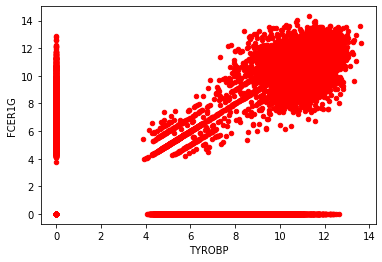

In [3]:
dir1 = "/booleanfs2/sahoo/Data/Colon/Cancer/GSE132465/"
cfile = dir1 + "Lee-2020-crc-csr-sc.h5ad"
import scanpy as sc
adata = sc.read(cfile)
mut.convertString(adata)
sc.pp.normalize_total(adata, target_sum=1e6)
sc.pp.log1p(adata, base=2)
mut.scatterPlot(adata, 'TYROBP', 'FCER1G')
adata

In [4]:
import bone
reload(bone)
def getLee2020RTv2(self, tn=1):
    self.prepareData("CRC_New_11.2", cfile="/Users/edadlani/public_html/Hegemon/explore.conf")
    atype = self.h.getSurvName('c tissue type (ch1)')
    atypes = ['N', 'C']
    ahash = {'Colorectal cancer':1, 'Normal mucosa':0}
    if (tn == 2):
        atype = self.h.getSurvName('c reactivity (ch1)')
        ahash = {'Reactive':0, 'Tolerant':1}
        atypes = ['R', 'T']
    if (tn == 3):
        atype = self.h.headers
        ahash = {'GSM3868434_R': 0, 'GSM3868436_R': 0,
                 'GSM3868427_R': 0, 'GSM3868430_R': 0, 'GSM3868431_R': 0,
                 'GSM3868434_T': 1, 'GSM3868436_T': 1,
                 'GSM3868427_T': 1, 'GSM3868430_T': 1, 'GSM3868431_T': 1}
        atypes = ['R', 'T']
    if (tn == 4):
        atype = self.h.headers
        ahash = {'GSM3868434_R': 1, 'GSM3868436_R': 1,
                 'GSM3868427_R': 1, 'GSM3868430_R': 1, 'GSM3868431_R': 1,
                 'GSM3868434_T': 2, 'GSM3868436_T': 2,
                 'GSM3868427_T': 2, 'GSM3868430_T': 2, 'GSM3868431_T': 2,
                 'GSM3868448_T': 0, 'GSM3868451_T': 0,
                 'GSM3868452_T': 0, 'GSM3868456_T': 0, 'GSM3868457_T': 0}
        atypes = ['NT', 'TR', 'TT']
    self.initData(atype, atypes, ahash)
    return
bone.IBDAnalysis.getLee2020RTv2 = getLee2020RTv2
def getLee2020SCblk(self, tn=1):
    self.prepareData("MACV328")
    atype = self.h.getSurvName('c Class')
    atypes = ['N', 'C']
    ahash = {'Tumor':1, 'Normal':0}
    self.initData(atype, atypes, ahash)
    return
bone.IBDAnalysis.getLee2020SCblk = getLee2020SCblk
def getLee2020MacSCblk(self, tn=1):
    self.prepareData("MACV328.2")
    atype = self.h.getSurvName('c Class')
    atypes = ['N', 'C']
    ahash = {'Tumor':1, 'Normal':0}
    self.initData(atype, atypes, ahash)
    return
bone.IBDAnalysis.getLee2020MacSCblk = getLee2020MacSCblk
def getLee2020EpiSCblk(self, tn=1):
    self.prepareData("MACV328.3")
    atype = self.h.getSurvName('c Class')
    atypes = ['N', 'C']
    ahash = {'Tumor':1, 'Normal':0}
    self.initData(atype, atypes, ahash)
    return
bone.IBDAnalysis.getLee2020EpiSCblk = getLee2020EpiSCblk

In [5]:
#Normal vs. Cancer All Cells 

ana = bone.IBDAnalysis()
ana.getLee2020SCblk()
ana.h.saveDiff("lee-2020-all-cells-diff.txt", ana.state[0], ana.state[1])

Lee 2020 crc scblk (n = 33)
GSE132465 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV328
33 [10, 23] GSE132465 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV328 MACV328


In [6]:
#Normal vs. Cancer Macrophage Specific Data (Highly Reactive/Highly Tolerant)
#Tolerant Normal vs Tolerant Tumor

ana = bone.IBDAnalysis()
ana.getLee2020RTv2(4)
ana.h.saveDiff("lee-2020-nc-diff.txt", ana.state[0], ana.state[2])

Lee, Cho 2020 scRNA crc: Highly Tolerant & Reactive Mac cells Mac Threshold After Normalization (human, scRNA -> pseudo) (n = 57)
GSE132465 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC_New_11.2
14 [5, 5, 4] GSE132465 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC_New_11.2 CRC_New_11.2


In [7]:
#Normal vs. Cancer Macrophage Specific Data (Highly Reactive/Highly Tolerant)
#Tumor Macrophages Only
#Reactive Tumor vs Tolerant Tumor
#atypes = ['NT', 'TR', 'TT']

ana = bone.IBDAnalysis()
ana.getLee2020RTv2(4)
ana.h.saveDiff("lee-2020-rt-diff.txt", ana.state[1], ana.state[2])

Lee, Cho 2020 scRNA crc: Highly Tolerant & Reactive Mac cells Mac Threshold After Normalization (human, scRNA -> pseudo) (n = 57)
GSE132465 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC_New_11.2
14 [5, 5, 4] GSE132465 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC_New_11.2 CRC_New_11.2


In [10]:
#Epithelial Cells (TYROBP & FCER1G <= 0 and EPCAM > 2)
#Normal vs. Cancer

ana = bone.IBDAnalysis()
ana.getLee2020EpiSCblk()
ana.h.saveDiff("lee-2020-epi-diff.txt", ana.state[0], ana.state[1])

Lee 2020 crc epi scblk (n = 33)
GSE132465 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV328.3
33 [10, 23] GSE132465 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV328.3 MACV328.3


In [5]:
def C13_Good_Signature():
#C13 Good Signature: Top 25 genes expressed in Epithelial cells
#From top 25, choose top 15 expressed in macrophage cells
#15 genes
    wt1, l1 = mut.getCls13()
    cfile = "lee-2020-epi-diff.txt" 
    df = mut.pd.read_csv(cfile, sep="\t", header=None)
    df.columns=["ID", "Name", "T", "P", "Diff"]
    df.index = df['ID']
    df1 = df.loc[l1[0],].sort_values('Diff', ascending=True)
    l1 = [list(df1['ID'][0:25])]
    cfile = "lee-2020-nc-diff.txt" 
    df = mut.pd.read_csv(cfile, sep="\t", header=None)
    df.columns=["ID", "Name", "T", "P", "Diff"]
    df.index = df['ID']
    df1 = df.loc[l1[0],].sort_values('Diff', ascending=True)
    l1 = [list(df1['ID'][0:15])]
    return [-1], set(df1['ID'][0:15])


def C13_Bad_Signature():
#High in Tumor tolerant cells
#High in Normal tolerant cells
#6 genes

    def just_tolerant():
        wt1, l1 = mut.getCls13()
        cfile = "lee-2020-rt-diff.txt"
        df = mut.pd.read_csv(cfile, sep="\t", header=None)
        df.columns=["ID", "Name", "T", "P", "Diff"]
        df.index = df['ID']
        df1 = df.loc[l1[0],].sort_values('Diff', ascending=True)
        l1 = [list(df1['ID'][0:15])]
        return [-1], l1
    
    def just_normal_tolerant():
        wt1, l1 = mut.getCls13()
        cfile = "lee-2020-nc-diff.txt"
        df = mut.pd.read_csv(cfile, sep="\t", header=None)
        df.columns=["ID", "Name", "T", "P", "Diff"]
        df.index = df['ID']
        df1 = df.loc[l1[0],].sort_values('Diff', ascending=False)
        l1 = [list(df1['ID'][0:10])]
        return [-1], l1
    
    wt2, l2 = just_tolerant()
    wt3, l3 = just_normal_tolerant()
    d = [l2[0],l3[0]]
    final=set.intersection(*[set(x) for x in d]) 
    return [-1],final

    
def C14_3_Good_Signature():
#7 genes in C14
#4 genes in C3

#Genes that are consistent across all separations listed. 

    wt1, l1 = mut.getCls14a3()
    cfile = "lee-2020-epi-diff.txt"
    df = mut.pd.read_csv(cfile, sep="\t", header=None)
    df.columns=["ID", "Name", "T", "P", "Diff"]
    df.index = df['ID']
    l2 = set(df.index).intersection(l1[0] + l1[1])
    df1 = df.loc[l2,].sort_values('Diff', ascending=True)
    
    l2 = [list(df1[df1['Diff'] > -0.25]['ID'])]
    
    cfile = "lee-2020-nc-diff.txt"
    df = mut.pd.read_csv(cfile, sep="\t", header=None)
    df.columns=["ID", "Name", "T", "P", "Diff"]
    df.index = df['ID']
    df1 = df.loc[l2[0],].sort_values('Diff', ascending=True)
    
    l2 = [list(df1[df1['Diff'] > -0.25]['ID'])]
    
    cfile = "lee-2020-rt-diff.txt"
    df = mut.pd.read_csv(cfile, sep="\t", header=None)
    df.columns=["ID", "Name", "T", "P", "Diff"]
    df.index = df['ID']
    df1 = df.loc[l2[0],].sort_values('Diff', ascending=True)
    
    l2 = [list(df1[df1['Diff'] < 0]['ID'])]
    
    cfile = "lee-2020-all-cells-diff.txt"
    df = mut.pd.read_csv(cfile, sep="\t", header=None)
    df.columns=["ID", "Name", "T", "P", "Diff"]
    df.index = df['ID']
    df1 = df.loc[l2[0],].sort_values('Diff', ascending=True)
    l2 = [list(df1[df1['Diff'] > -0.1]['ID'])]
    
    return [1, 2], [set(l1[0]).intersection(l2[0]), set(l1[1]).intersection(l2[0])]


def C14_3_Bad_Signature():
#19 genes in C14
#6 genes in C3
    
    #High in epithelial normal colon cells
    def epithelial_cells():
        wt1, l1 = mut.getCls14a3()
        cfile = "lee-2020-epi-diff.txt"
        df = mut.pd.read_csv(cfile, sep="\t", header=None)
        df.columns=["ID", "Name", "T", "P", "Diff"]
        df.index = df['ID']
        df1=df.loc[df['ID'].isin(l1[0])]
        df1 = df1.sort_values('Diff', ascending=True)
        l1 = [list(df1['ID'][0:40])]
        return [-1], l1
    
    #High in Normal colon cells (all cells)
    def all_cells():
        wt1, l1 = mut.getCls14a3()
        cfile = "lee-2020-all-cells-diff.txt"
        df = mut.pd.read_csv(cfile, sep="\t", header=None)
        df.columns=["ID", "Name", "T", "P", "Diff"]
        df.index = df['ID']
        df1=df.loc[df['ID'].isin(l1[0])]
        df1 = df1.sort_values('Diff', ascending=True)
        l1 = [list(df1['ID'][0:50])]
        return [-1], l1
    
    wt2, l2 = epithelial_cells()
    wt3, l3 = all_cells()
    d = [l2[0],l3[0]]
    final=set.intersection(*[set(x) for x in d]) 
    return [-1],final

def intersection(lst1, lst2):
    return list(set(lst1) & set(lst2))



In [6]:
wt13_good,l13_good=C13_Good_Signature()
wt143_good,l143_good=C14_3_Good_Signature()
good_signature=[l13_good,set(l143_good[0]),set(l143_good[1])]


wt13_bad,l13_bad=C13_Bad_Signature()
wt143_bad,l143_bad=C14_3_Bad_Signature()

wt1, l1 = mut.getCls14a3()
l14_bad=set(intersection(l1[0],l143_bad))
l3_bad=set(intersection(l1[1],l143_bad))

wt143_bad,l143_bad=C14_3_Bad_Signature()
bad_signature=[l13_bad,l14_bad,l3_bad]


In [6]:
print(good_signature)

[{'OAS2', 'TAP1', 'XAF1', 'IFIT3', 'IFIT2', 'OAS1', 'ISG15', 'TRIM21', 'MX1', 'APOL1', 'OAS3', 'CXCL9', 'SP110', 'PML', 'STAT1'}, {'RPL3', 'SLC46A3', 'CD302', 'RBM4', 'METTL7A', 'CCDC88A', 'RPL17'}, {'CLEC10A', 'DNASE1L3', 'METTL7A', 'RPL17'}]


In [7]:
print(bad_signature)

[{'PSMB10', 'PSME1', 'SFT2D2', 'IRF1', 'ZC3HAV1', 'SCO2'}, {'SLC38A7', 'ZDHHC6', 'NOL8', 'DIS3', 'CSE1L', 'RPS16', 'RPS21', 'LONP2', 'CREBL2', 'TMEM70', 'IPO5', 'PCBP2', 'C12orf29', 'MARS', 'SGPL1', 'CLEC4A', 'TCEA1', 'SMG7', 'NFYB'}, {'NOL8', 'DIS3', 'RPS16', 'RPS21', 'LONP2', 'MARS'}]


### SMaRT Signature

Lee, Cho 2020 scRNA crc: Highly Tolerant & Reactive Mac cells Mac Threshold After Normalization (human, scRNA -> pseudo) (n = 57)
GSE132465 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC_New_11.2
14 [5, 5, 4] GSE132465 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC_New_11.2 CRC_New_11.2
[4228, 4200, 2, 3123, 3289, 168, 14, 4252, 440, 51, 30, 14, 4207, 4200, 2, 7516, 25, 116, 78, 74, 122, 142, 4198, 2, 4250, 66, 2, 8, 144, 107, 14]
[66]
[48]
[-1]
[48]
[4228, 4200, 2, 3123, 3289, 168, 14, 4252, 440, 51, 30, 14, 4207, 4200, 2, 7516, 25, 116, 78, 74, 122, 142, 4198, 2, 4250, 66, 2, 8, 144, 107, 14]
[144, 168]
[137, 153]
[1, 2]
[113, 127]
[4228, 4200, 2, 3123, 3289, 168, 14, 4252, 440, 51, 30, 14, 4207, 4200, 2, 7516, 25, 116, 78, 74, 122, 142, 4198, 2, 4250, 66, 2, 8, 144, 107, 14]
[66, 144, 168]
[48, 137, 153]
[-1, 1, 2]
[48, 113, 127]
Lee 2020 crc scblk (n = 33)
GSE132465 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV328
33 [10, 23] GSE132465 http://he

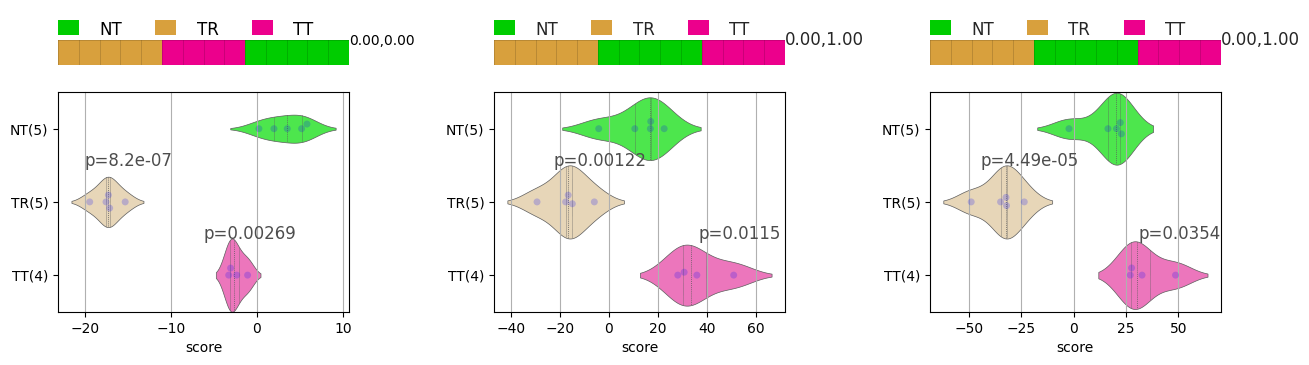

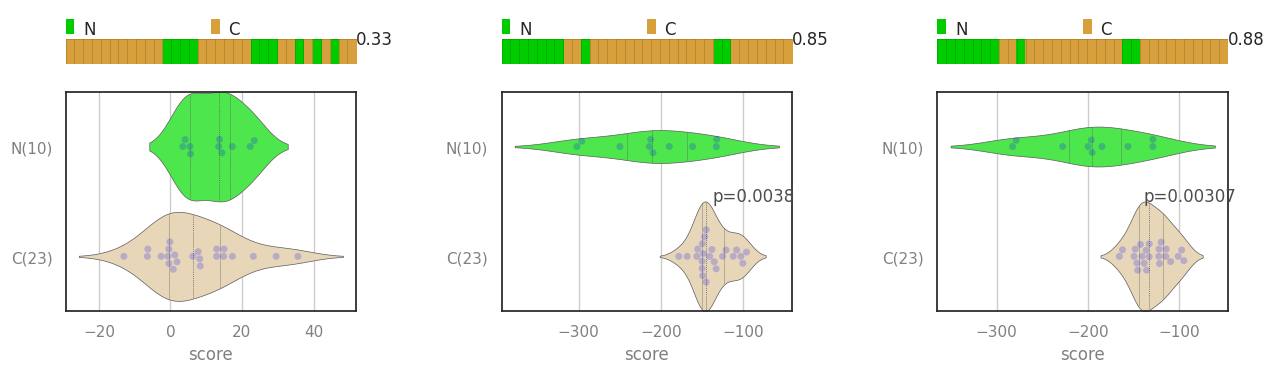

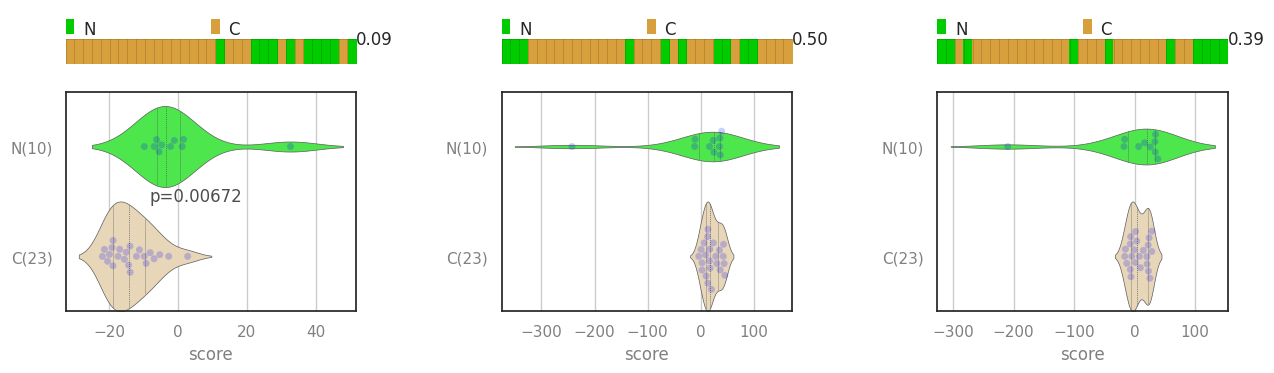

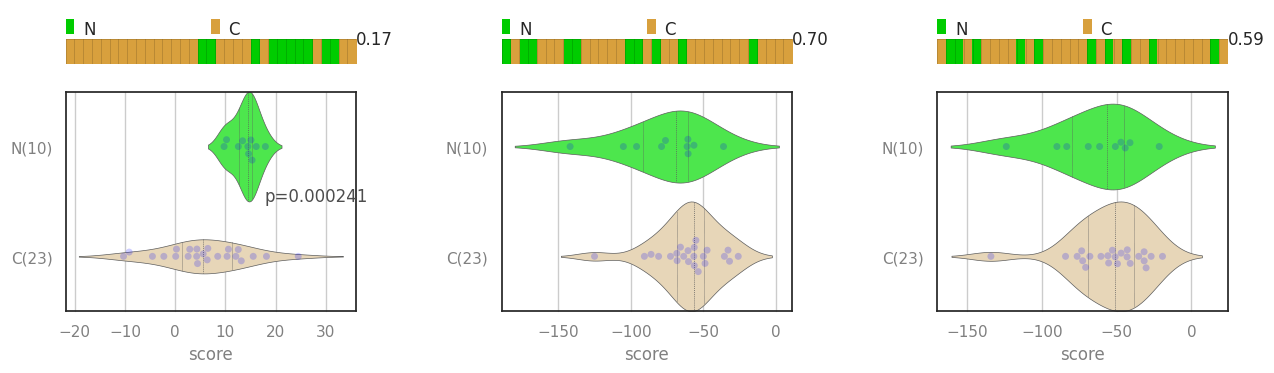

In [13]:
#Training

ana = bone.IBDAnalysis()
ana.getLee2020RTv2(4)
fig = processDataHnorm(ana)


ana = bone.IBDAnalysis()
ana.getLee2020SCblk()
fig = processDataHnorm(ana)

ana = bone.IBDAnalysis()
ana.getLee2020MacSCblk()
fig = processDataHnorm(ana)


ana = bone.IBDAnalysis()
ana.getLee2020EpiSCblk()
fig = processDataHnorm(ana)

Zheng 2022 scRNA crc: Macrophage cells (human, scRNA -> pseudo) (n = 13)
GSE161277 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC_New_3.1
7 [3, 4] GSE161277 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC_New_3.1 CRC_New_3.1
[4228, 4200, 2, 3123, 3289, 168, 14, 4252, 440, 51, 30, 14, 4207, 4200, 2, 7516, 25, 116, 78, 74, 122, 142, 4198, 2, 4250, 66, 2, 8, 144, 107, 14]
[66]
[48]
[-1]
[48]
[4228, 4200, 2, 3123, 3289, 168, 14, 4252, 440, 51, 30, 14, 4207, 4200, 2, 7516, 25, 116, 78, 74, 122, 142, 4198, 2, 4250, 66, 2, 8, 144, 107, 14]
[144, 168]
[137, 153]
[1, 2]
[113, 124]
[4228, 4200, 2, 3123, 3289, 168, 14, 4252, 440, 51, 30, 14, 4207, 4200, 2, 7516, 25, 116, 78, 74, 122, 142, 4198, 2, 4250, 66, 2, 8, 144, 107, 14]
[66, 144, 168]
[48, 137, 153]
[-1, 1, 2]
[48, 113, 124]
Khaliq 2022 scRNA crc: Macrophage cells (human, scRNA -> pseudo) (n = 22)
GSE200997 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC_New_6.1
22 [7, 15] GSE200997 http://hegemon.ucsd.edu

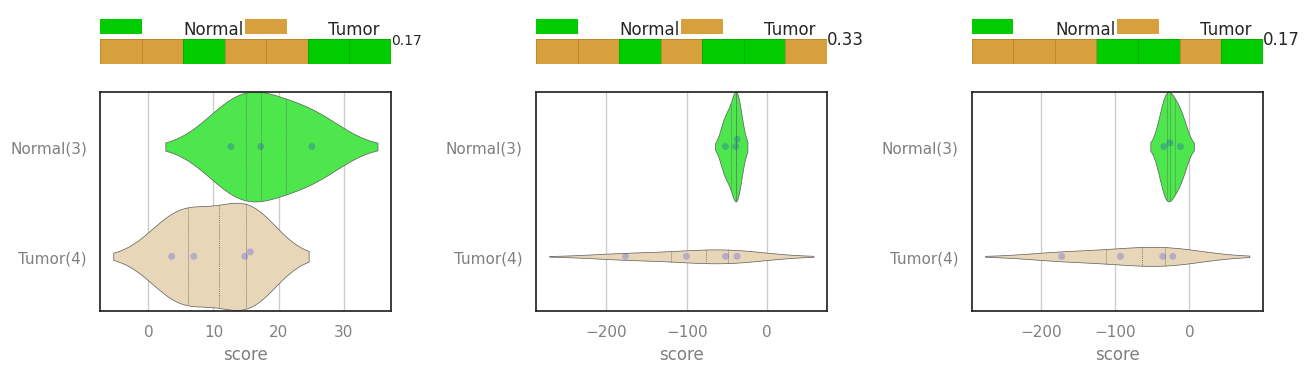

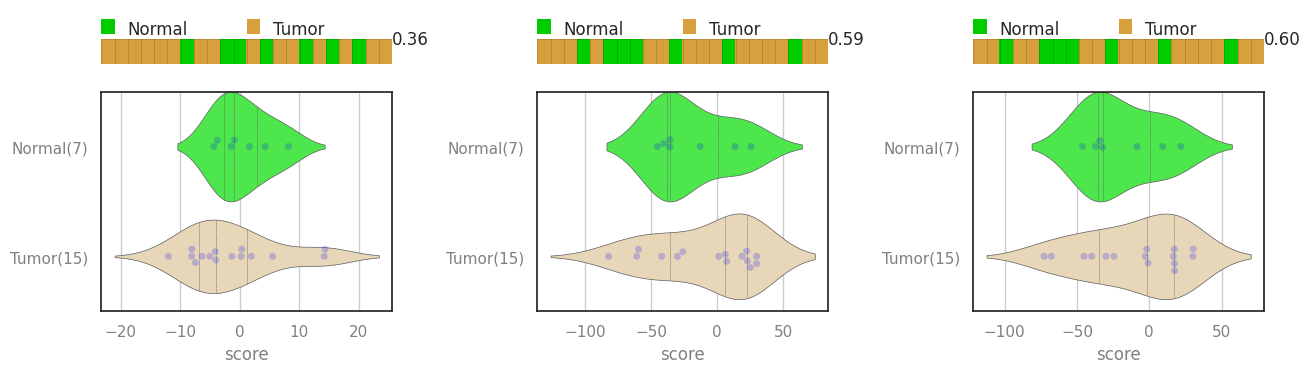

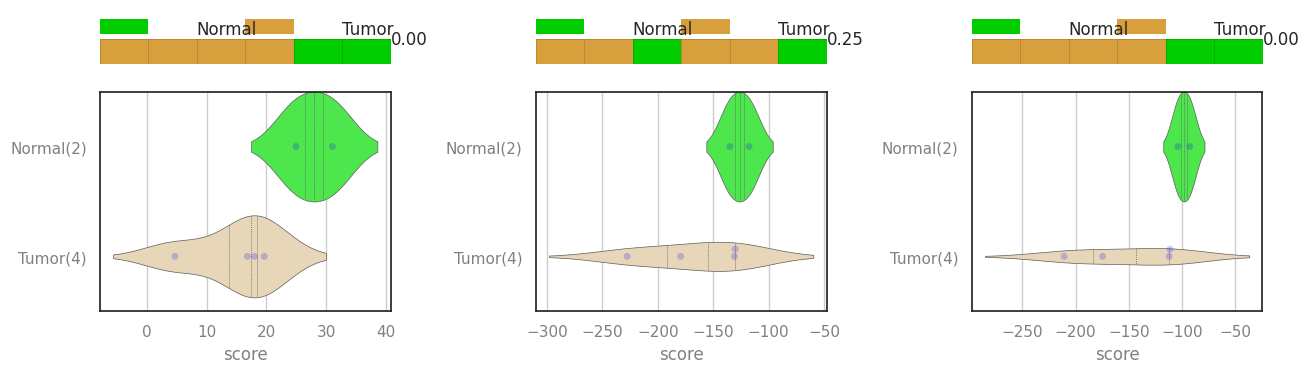

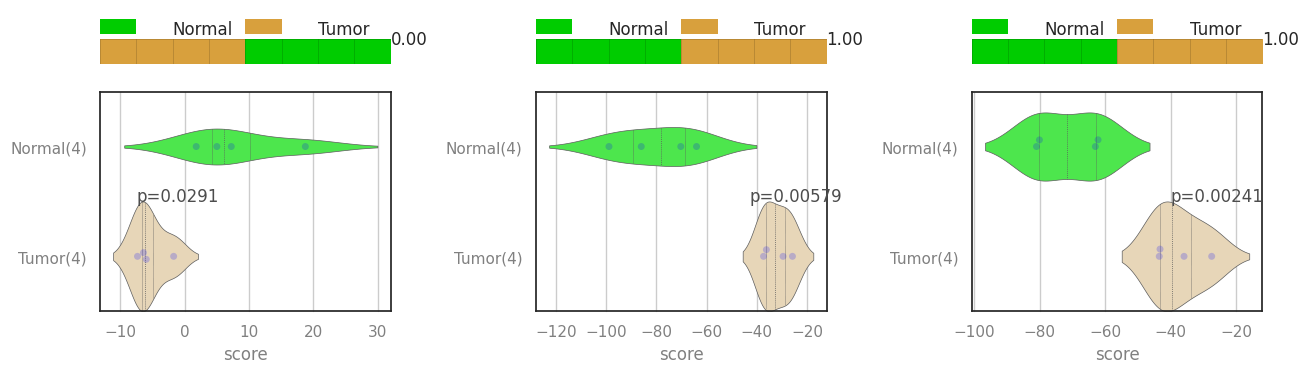

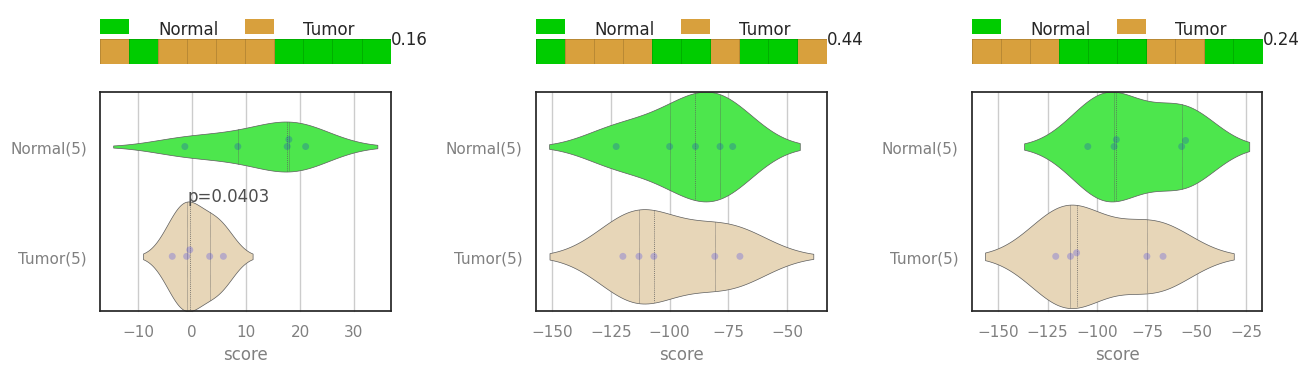

In [20]:
#Validation Datasets: Macrophage Level

ana = IMMAnalysis()
ana.get_Zheng_2022_mac_cells()
fig = processDataHnorm(ana)

ana = IMMAnalysis()
ana.get_Khaliq_2022_mac_cells()
fig = processDataHnorm(ana)

ana = IMMAnalysis()
ana.get_Guo_2023_mac_cells_technical_replicates()
fig = processDataHnorm(ana)

ana = IMMAnalysis()
ana.get_Wu_2022_mac_cells_technical_replicates()
fig = processDataHnorm(ana)


ana = IMMAnalysis()
ana.get_Lee_2022_mac_cells()
fig = processDataHnorm(ana)

Zheng 2022 scRNA crc: All cells (human, scRNA -> pseudo) (n = 13)
GSE161277 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC_New_3
7 [3, 4] GSE161277 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC_New_3 CRC_New_3
[4228, 4200, 2, 3123, 3289, 168, 14, 4252, 440, 51, 30, 14, 4207, 4200, 2, 7516, 25, 116, 78, 74, 122, 142, 4198, 2, 4250, 66, 2, 8, 144, 107, 14]
[66]
[48]
[-1]
[49]
[4228, 4200, 2, 3123, 3289, 168, 14, 4252, 440, 51, 30, 14, 4207, 4200, 2, 7516, 25, 116, 78, 74, 122, 142, 4198, 2, 4250, 66, 2, 8, 144, 107, 14]
[144, 168]
[137, 153]
[1, 2]
[113, 124]
[4228, 4200, 2, 3123, 3289, 168, 14, 4252, 440, 51, 30, 14, 4207, 4200, 2, 7516, 25, 116, 78, 74, 122, 142, 4198, 2, 4250, 66, 2, 8, 144, 107, 14]
[66, 144, 168]
[48, 137, 153]
[-1, 1, 2]
[49, 113, 124]
Khaliq 2022 scRNA crc: All cells (human, scRNA -> pseudo) (n = 23)
GSE200997 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC_New_6
23 [7, 16] GSE200997 http://hegemon.ucsd.edu/Tools/explore.php?key

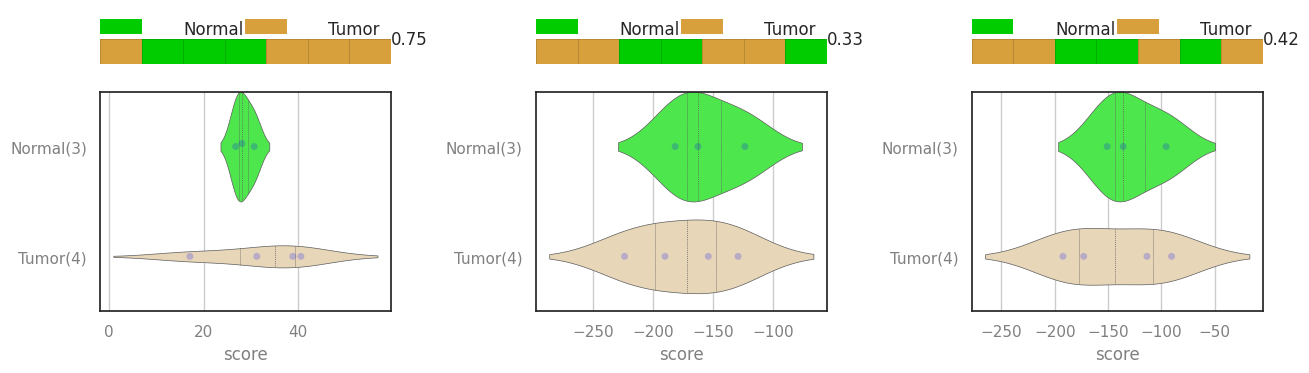

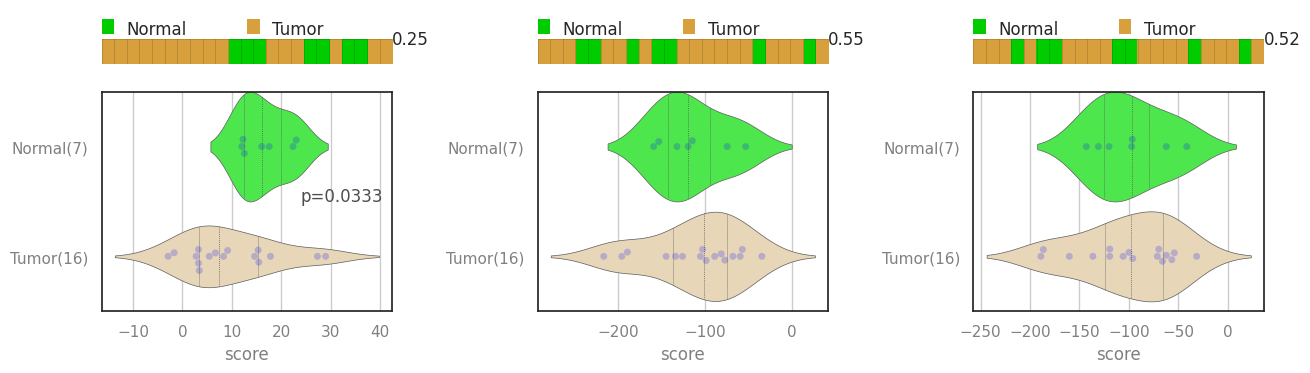

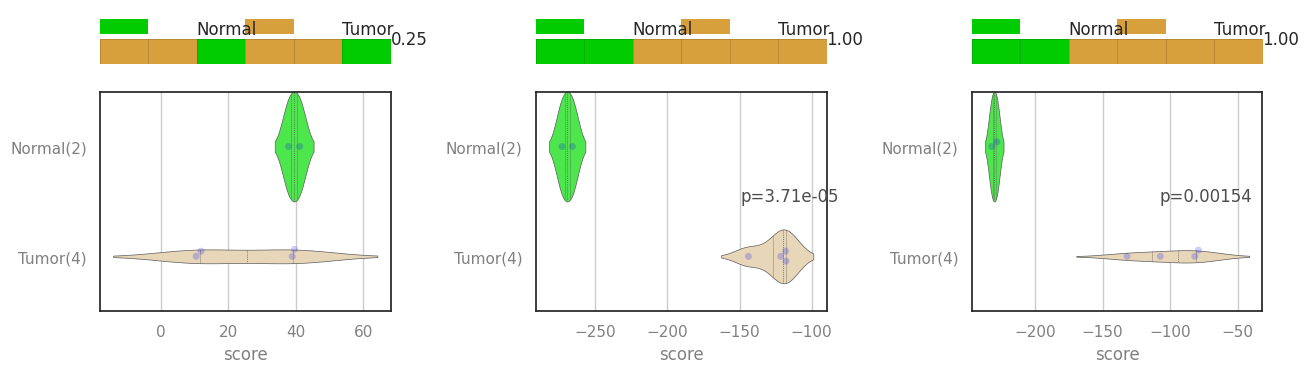

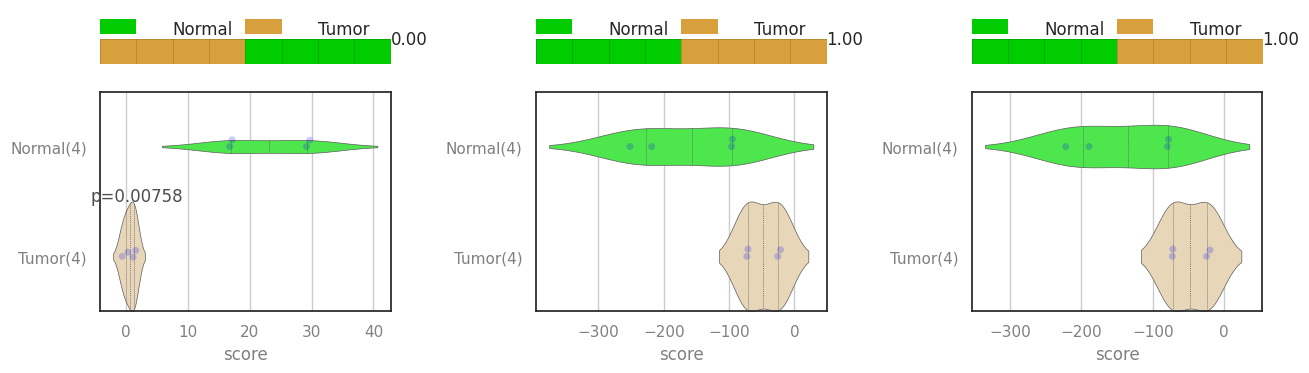

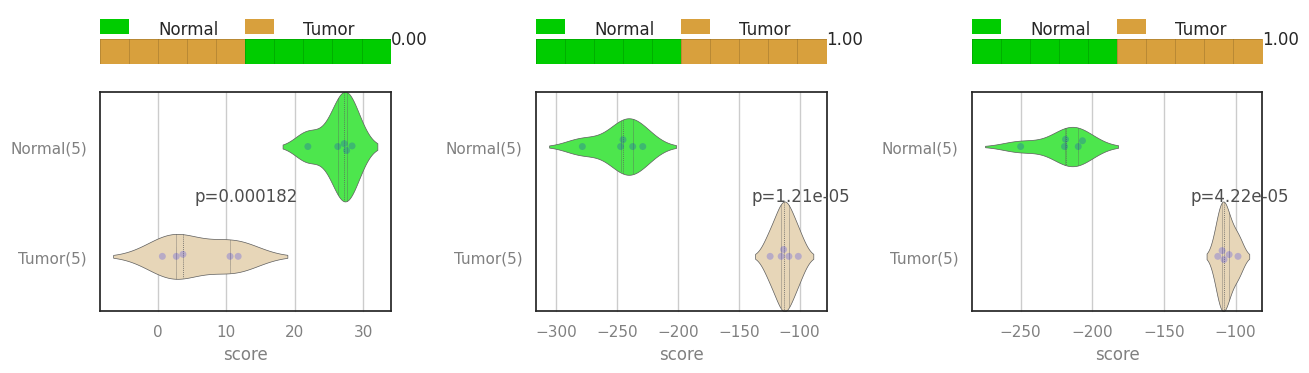

In [21]:
#Validation Datasets: All Cells Level

ana = IMMAnalysis()
ana.get_Zheng_2022_all_cells()
fig = processDataHnorm(ana)

ana = IMMAnalysis()
ana.get_Khaliq_2022_all_cells()
fig = processDataHnorm(ana)


ana = IMMAnalysis() 
ana.get_Guo_2023_all_cells_technical_replicates()
fig = processDataHnorm(ana)

ana = IMMAnalysis() 
ana.get_Wu_2022_all_cells_technical_replicates()
fig = processDataHnorm(ana)


ana = IMMAnalysis()
ana.get_Lee_2022_all_cells()
fig = processDataHnorm(ana)

Global 2018 GPL570 Colon Purged (n = 1911)
GEO CRC115 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC145
1832 [170, 1662] GEO CRC115 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC145 CRC145
[4228, 4200, 2, 3123, 3289, 168, 14, 4252, 440, 51, 30, 14, 4207, 4200, 2, 7516, 25, 116, 78, 74, 122, 142, 4198, 2, 4250, 66, 2, 8, 144, 107, 14]
[66]
[48]
[-1]
[37]
[4228, 4200, 2, 3123, 3289, 168, 14, 4252, 440, 51, 30, 14, 4207, 4200, 2, 7516, 25, 116, 78, 74, 122, 142, 4198, 2, 4250, 66, 2, 8, 144, 107, 14]
[144, 168]
[137, 153]
[1, 2]
[75, 80]
[4228, 4200, 2, 3123, 3289, 168, 14, 4252, 440, 51, 30, 14, 4207, 4200, 2, 7516, 25, 116, 78, 74, 122, 142, 4198, 2, 4250, 66, 2, 8, 144, 107, 14]
[66, 144, 168]
[48, 137, 153]
[-1, 1, 2]
[37, 75, 80]
TCGA 2017 CRC mRNA (n = 698)
TCGA http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC80
695 [51, 644] TCGA http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC80 CRC80
[4228, 4200, 2, 3123, 3289, 168, 14, 4252, 440, 51, 3

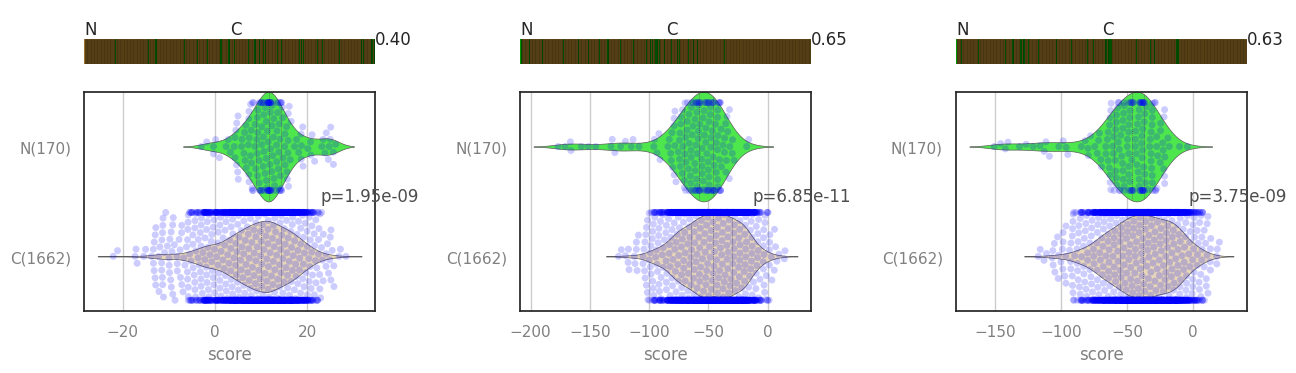

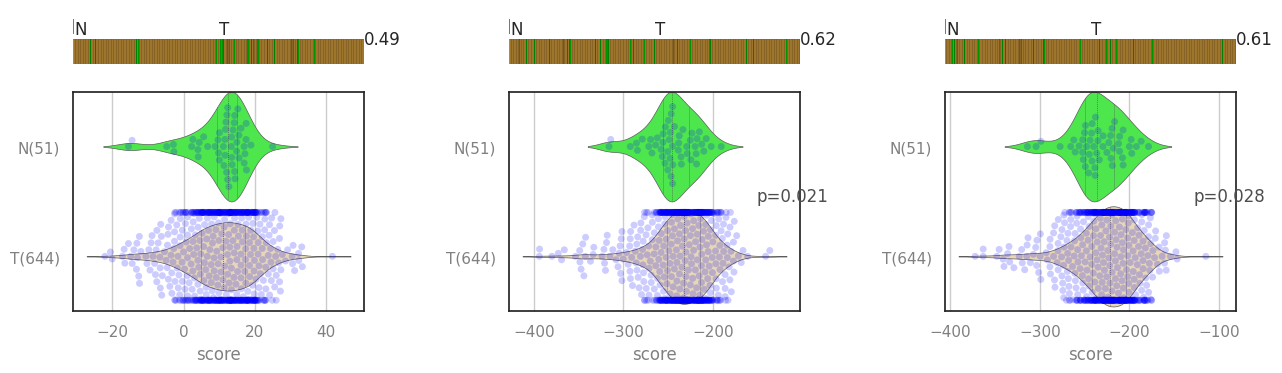

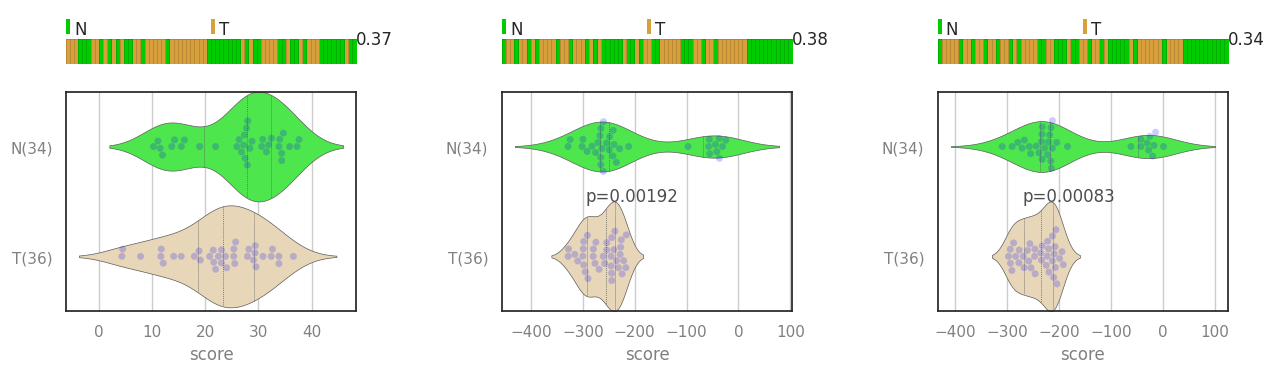

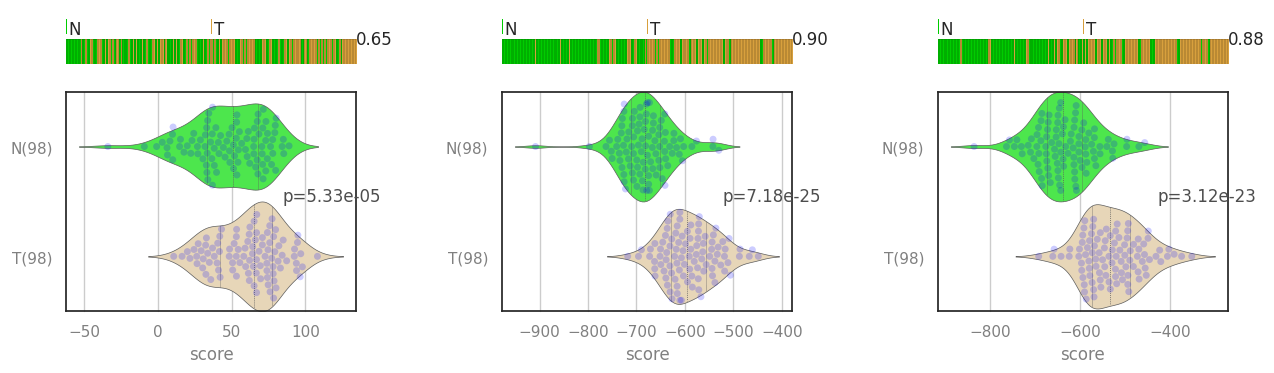

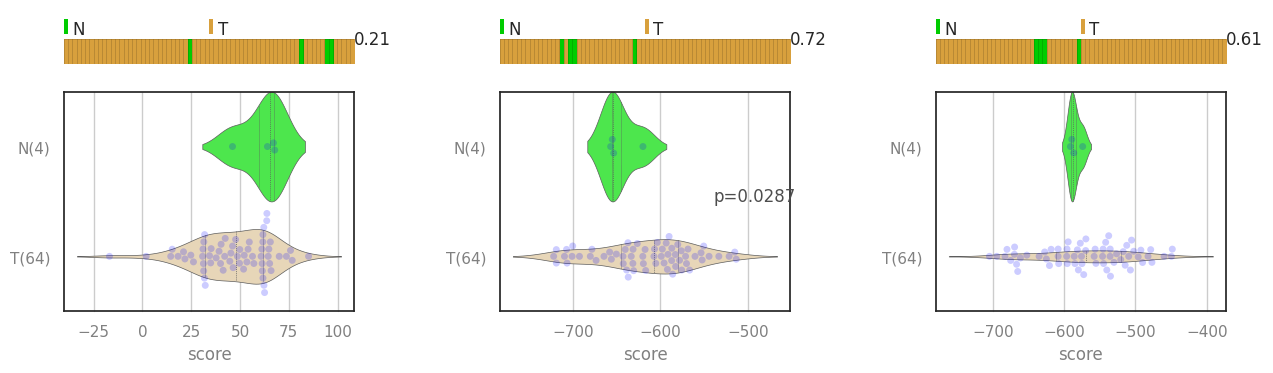

In [16]:
#Large Cohort Datasets

ana = IMMAnalysis()
ana.getColonGEOPurged(2)
fig = processDataHnorm(ana)

ana = IMMAnalysis()
ana.getTCGACRC(2)
fig = processDataHnorm(ana)

ana = IMMAnalysis()
ana.getSkrzypczak2010(2)
fig = processDataHnorm(ana)

ana = IMMAnalysis()
ana.getSole2014(2)
fig = processDataHnorm(ana)

ana = IMMAnalysis()
ana.getChen2016(2)
fig = processDataHnorm(ana)

### Good Signature

Lee, Cho 2020 scRNA crc: Highly Tolerant & Reactive Mac cells Mac Threshold After Normalization (human, scRNA -> pseudo) (n = 57)
GSE132465 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC_New_11.2
14 [5, 5, 4] GSE132465 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC_New_11.2 CRC_New_11.2
[15]
[7, 4]
[15, 7, 4]
Lee 2020 crc scblk (n = 33)
GSE132465 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV328
33 [10, 23] GSE132465 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV328 MACV328
[15]
[7, 4]
[15, 7, 4]
Lee 2020 crc mac scblk (n = 33)
GSE132465 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV328.2
33 [10, 23] GSE132465 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV328.2 MACV328.2
[15]
[7, 4]
[15, 7, 4]
Lee 2020 crc epi scblk (n = 33)
GSE132465 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV328.3
33 [10, 23] GSE132465 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV328.3 MACV328.3
[15]
[7, 4]
[15, 7, 4]


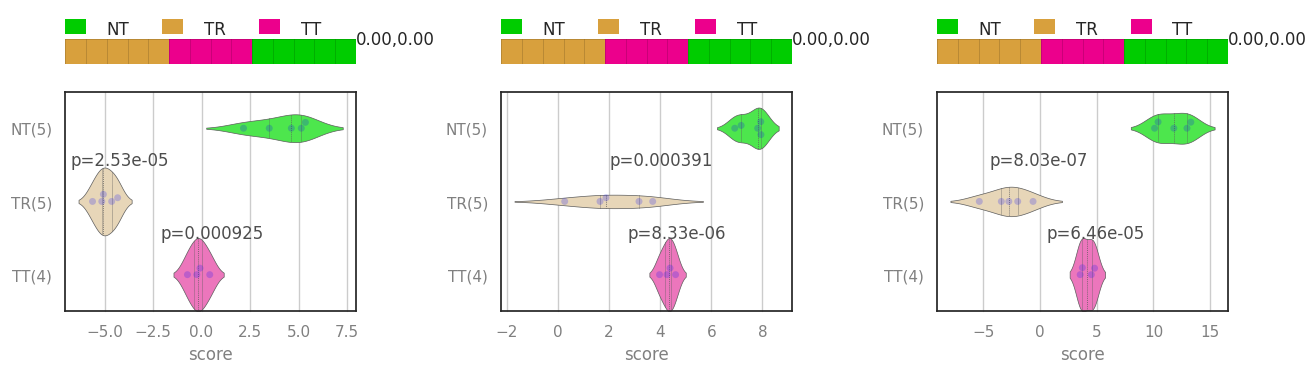

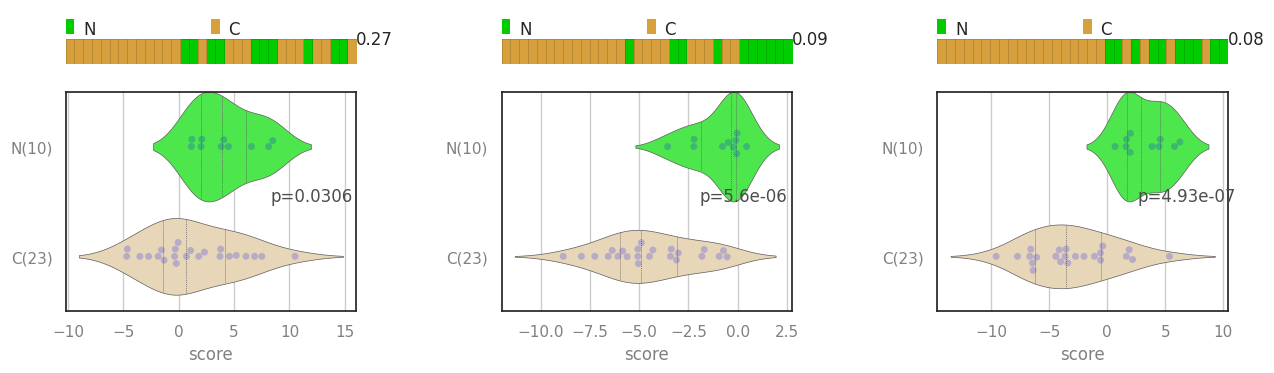

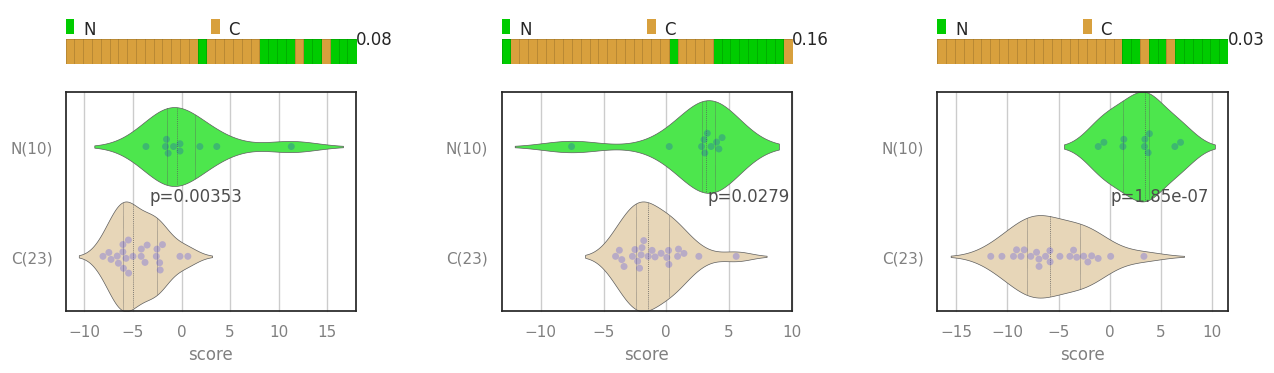

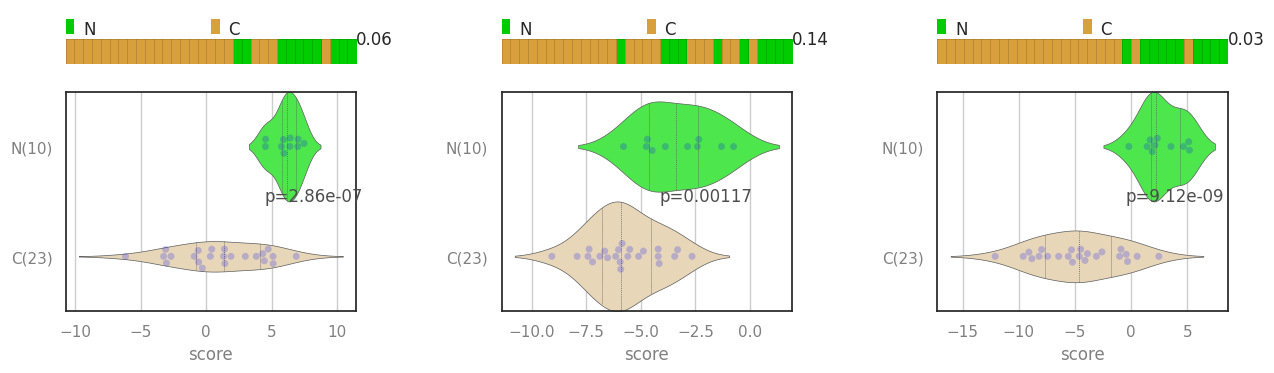

In [17]:
#Training

ana = bone.IBDAnalysis()
ana.getLee2020RTv2(4)
fig = processDataHnorm_13_14_3_w_l1(ana,good_signature)


ana = bone.IBDAnalysis()
ana.getLee2020SCblk()
fig = processDataHnorm_13_14_3_w_l1(ana,good_signature)

ana = bone.IBDAnalysis()
ana.getLee2020MacSCblk()
fig = processDataHnorm_13_14_3_w_l1(ana,good_signature)


ana = bone.IBDAnalysis()
ana.getLee2020EpiSCblk()
fig = processDataHnorm_13_14_3_w_l1(ana,good_signature)

Zheng 2022 scRNA crc: Macrophage cells (human, scRNA -> pseudo) (n = 13)
GSE161277 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC_New_3.1
7 [3, 4] GSE161277 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC_New_3.1 CRC_New_3.1
[15]
[7, 4]
[15, 7, 4]
Khaliq 2022 scRNA crc: Macrophage cells (human, scRNA -> pseudo) (n = 22)
GSE200997 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC_New_6.1
22 [7, 15] GSE200997 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC_New_6.1 CRC_New_6.1
[15]
[7, 4]
[15, 7, 4]
Guo 2023 scRNA crc: Macrophage cells (human, scRNA -> pseudo) artificial technical replicates (n = 6)
GSE222300 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC_New_7.3
6 [2, 4] GSE222300 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC_New_7.3 CRC_New_7.3
[15]
[7, 4]
[15, 7, 4]
Wu 2022 scRNA crc: Macrophage cells (human, scRNA -> pseudo) artificial technical replicates (n = 8)
GSE139555 http://hegemon.ucsd.edu/Tools/explore.php?ke

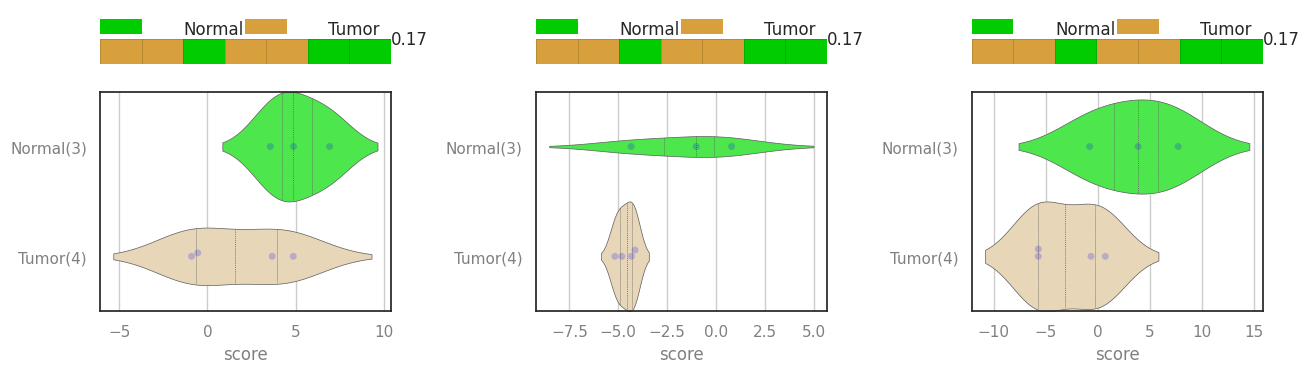

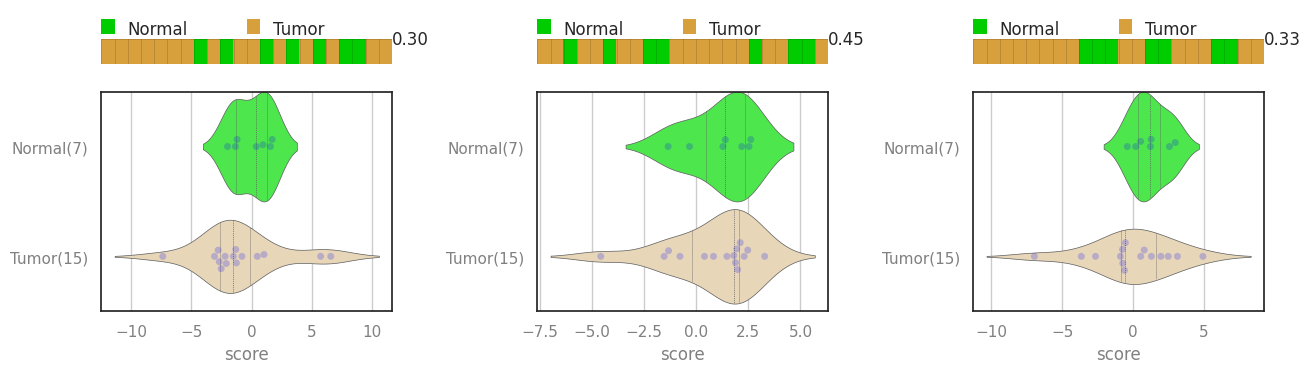

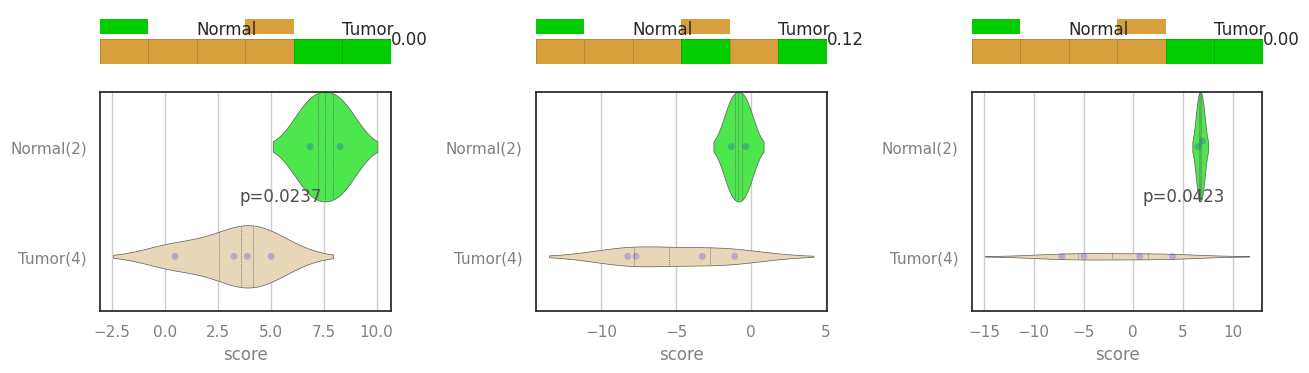

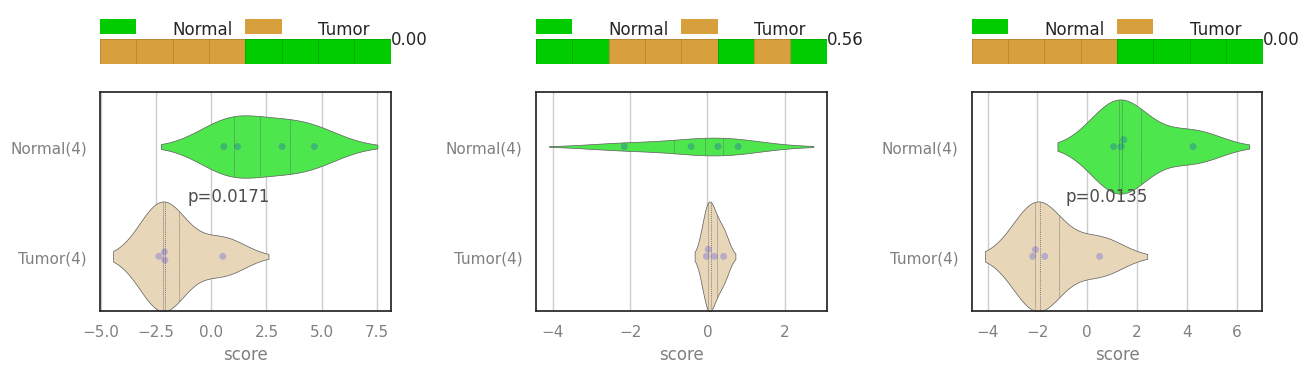

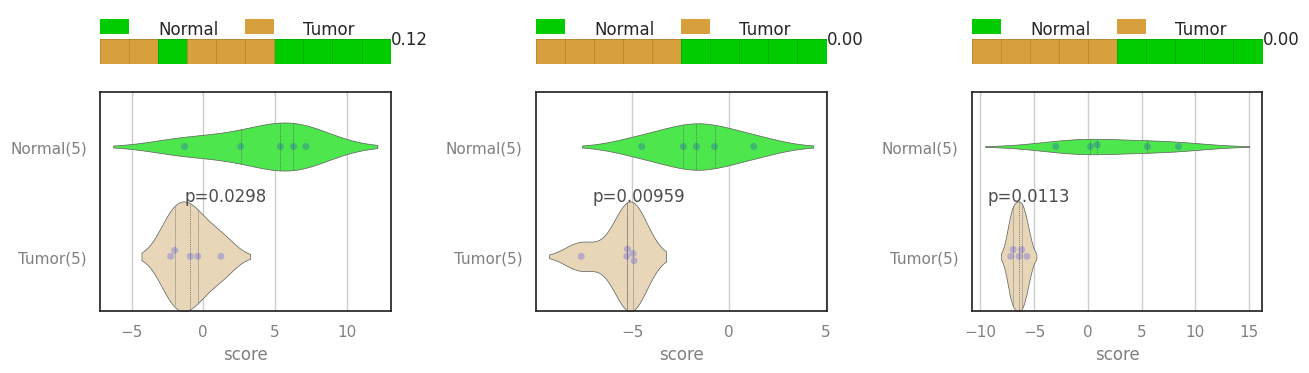

In [22]:
#Validation Datasets: Macrophage Level

ana = IMMAnalysis()
ana.get_Zheng_2022_mac_cells()
fig = processDataHnorm_13_14_3_w_l1(ana,good_signature)

ana = IMMAnalysis()
ana.get_Khaliq_2022_mac_cells()
fig = processDataHnorm_13_14_3_w_l1(ana,good_signature)


ana = IMMAnalysis()
ana.get_Guo_2023_mac_cells_technical_replicates()
fig = processDataHnorm_13_14_3_w_l1(ana,good_signature)

ana = IMMAnalysis()
ana.get_Wu_2022_mac_cells_technical_replicates()
fig = processDataHnorm_13_14_3_w_l1(ana,good_signature)


ana = IMMAnalysis()
ana.get_Lee_2022_mac_cells()
fig = processDataHnorm_13_14_3_w_l1(ana,good_signature)

Zheng 2022 scRNA crc: All cells (human, scRNA -> pseudo) (n = 13)
GSE161277 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC_New_3
7 [3, 4] GSE161277 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC_New_3 CRC_New_3
[15]
[7, 4]
[15, 7, 4]
Khaliq 2022 scRNA crc: All cells (human, scRNA -> pseudo) (n = 23)
GSE200997 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC_New_6
23 [7, 16] GSE200997 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC_New_6 CRC_New_6
[15]
[7, 4]
[15, 7, 4]
Guo 2023 scRNA crc: All cells (human, scRNA -> pseudo) artificial technical replicates (n = 6)
GSE222300 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC_New_7.2
6 [2, 4] GSE222300 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC_New_7.2 CRC_New_7.2
[15]
[7, 4]
[15, 7, 4]
Wu 2022 scRNA crc: All cells (human, scRNA -> pseudo) artificial technical replicates (n = 8)
GSE139555 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC_New_9.2
8 [4, 4] GSE13955

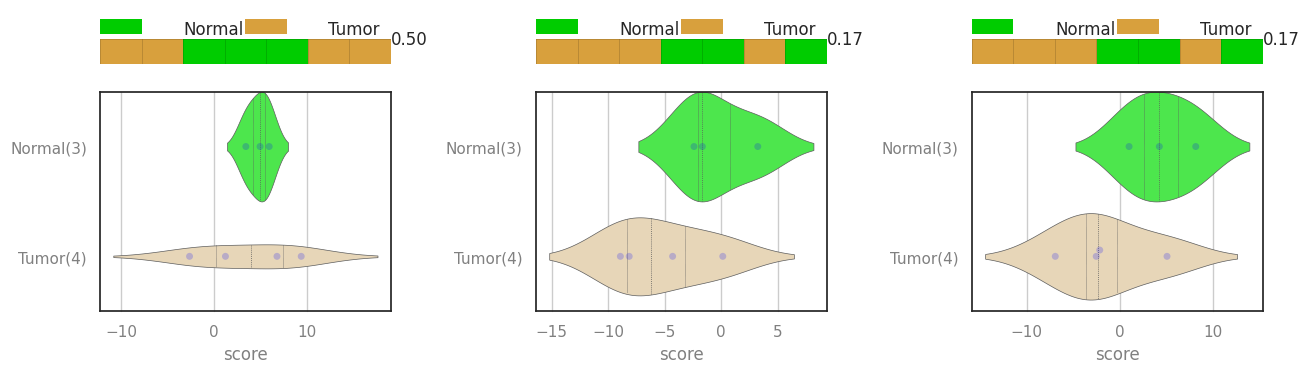

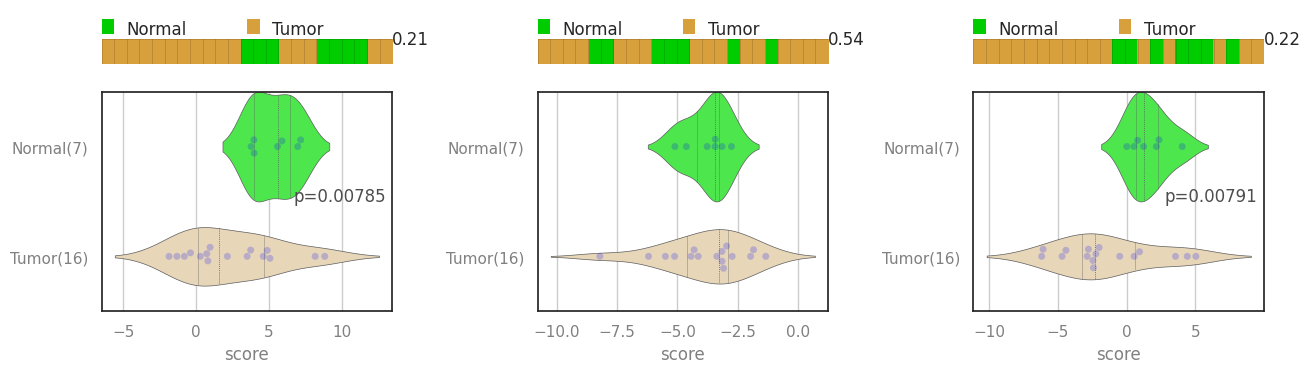

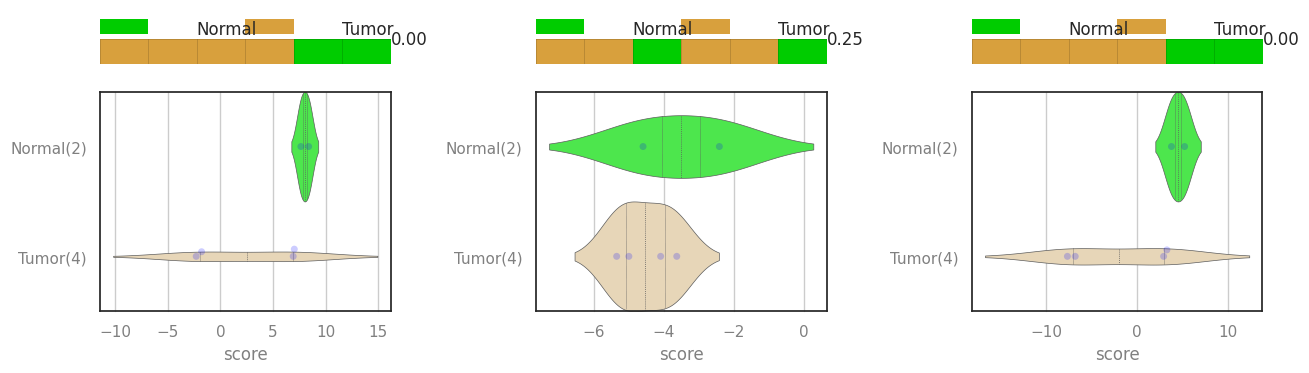

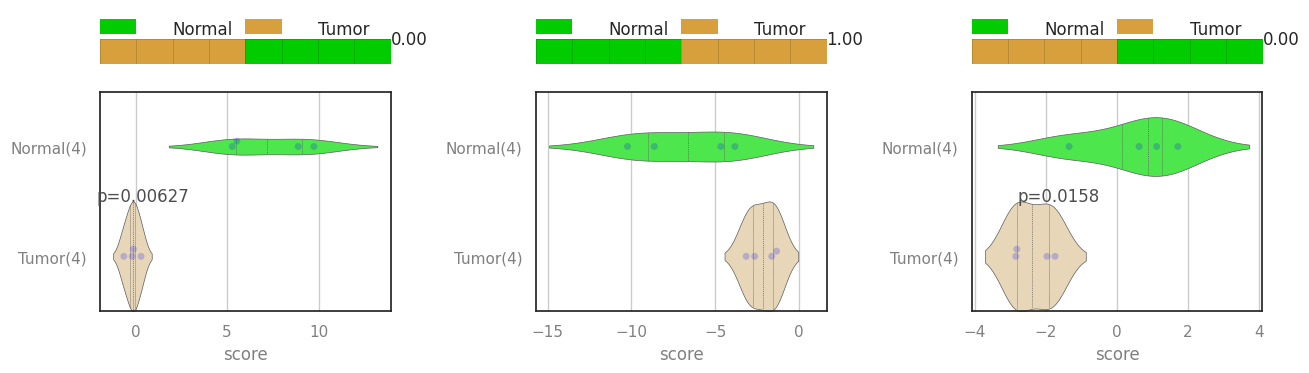

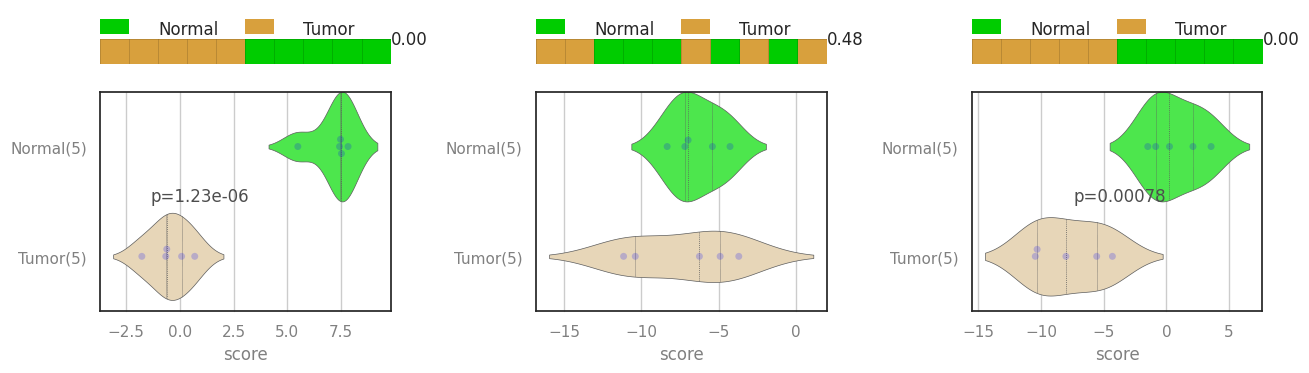

In [23]:
#Validation Datasets: All Cells Level

ana = IMMAnalysis()
ana.get_Zheng_2022_all_cells()
fig = processDataHnorm_13_14_3_w_l1(ana,good_signature)

ana = IMMAnalysis()
ana.get_Khaliq_2022_all_cells()
fig = processDataHnorm_13_14_3_w_l1(ana,good_signature)


ana = IMMAnalysis()
ana.get_Guo_2023_all_cells_technical_replicates()
fig = processDataHnorm_13_14_3_w_l1(ana,good_signature)

ana = IMMAnalysis()
ana.get_Wu_2022_all_cells_technical_replicates()
fig = processDataHnorm_13_14_3_w_l1(ana,good_signature)


ana = IMMAnalysis()
ana.get_Lee_2022_all_cells()
fig = processDataHnorm_13_14_3_w_l1(ana,good_signature)


Global 2018 GPL570 Colon Purged (n = 1911)
GEO CRC115 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC145
1832 [170, 1662] GEO CRC115 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC145 CRC145
[13]
[5, 3]
[13, 5, 3]
TCGA 2017 CRC mRNA (n = 698)
TCGA http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC80
695 [51, 644] TCGA http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC80 CRC80
[16]
[7, 4]
[16, 7, 4]
Skrzypczak 2010 NoAdCa (n = 145)
GSE20916 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC137
70 [34, 36] GSE20916 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC137 CRC137
[29]
[12, 7]
[29, 12, 7]
Sole 2014 crc (n = 246)
GSE44076 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC149
196 [98, 98] GSE44076 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC149 CRC149
[60]
[23, 10]
[60, 23, 10]
Chen 2016 crc GPL570 (n = 68)
GSE62932 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC154
68 [4, 64] GSE62932 http://

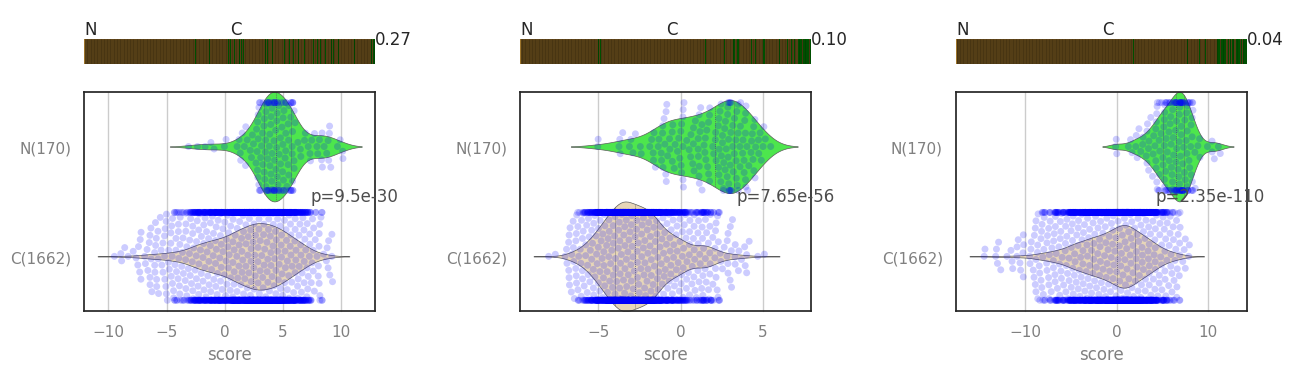

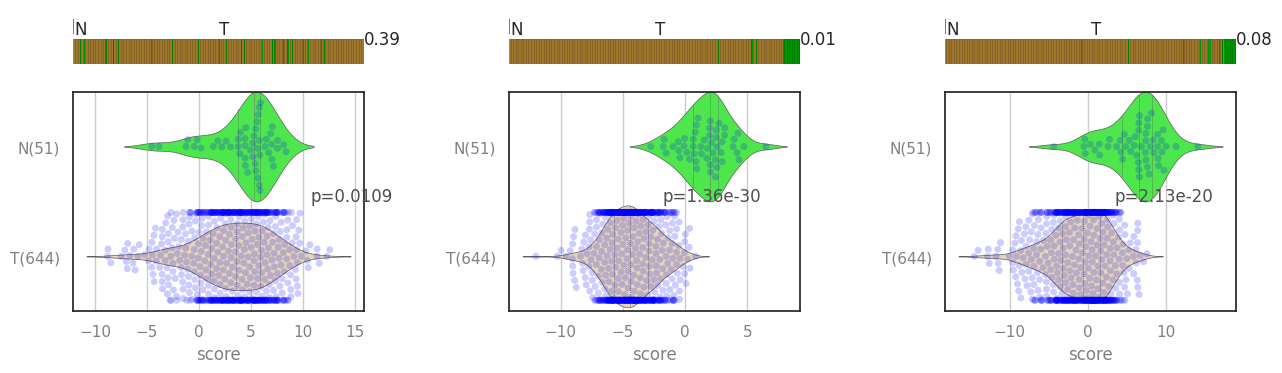

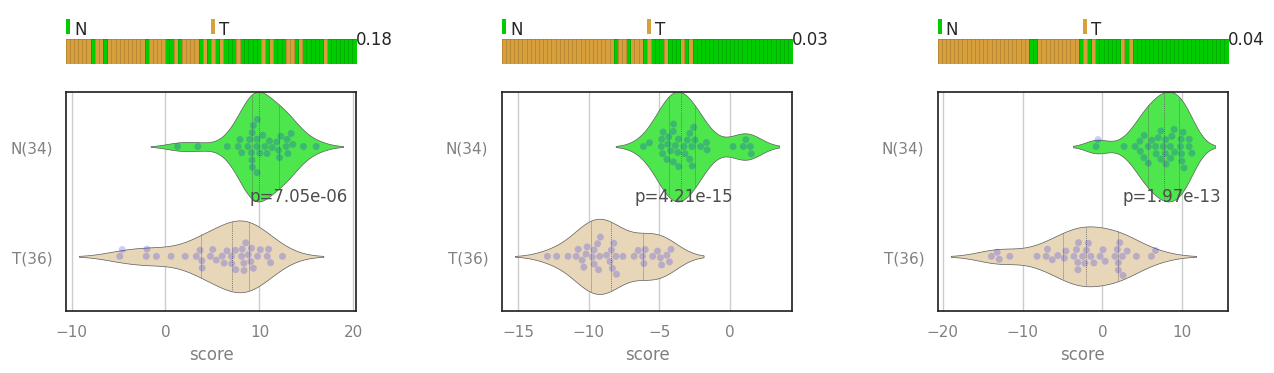

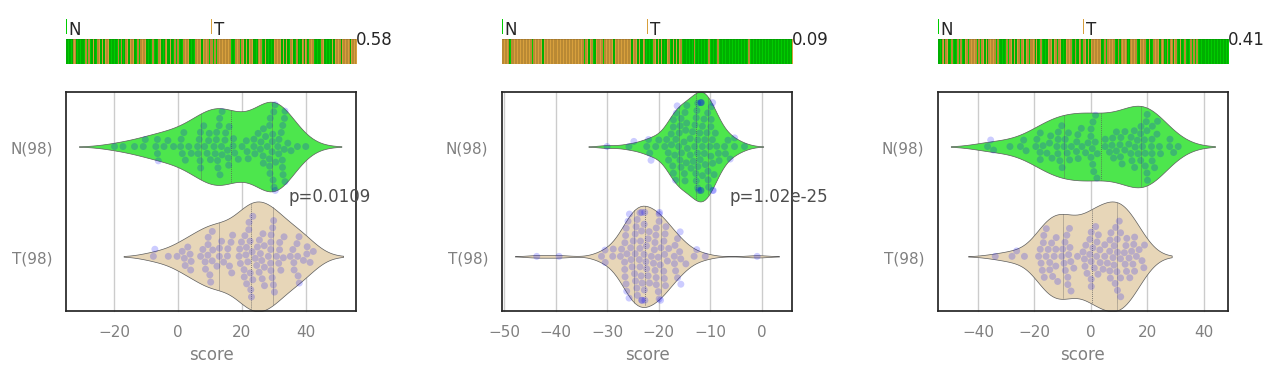

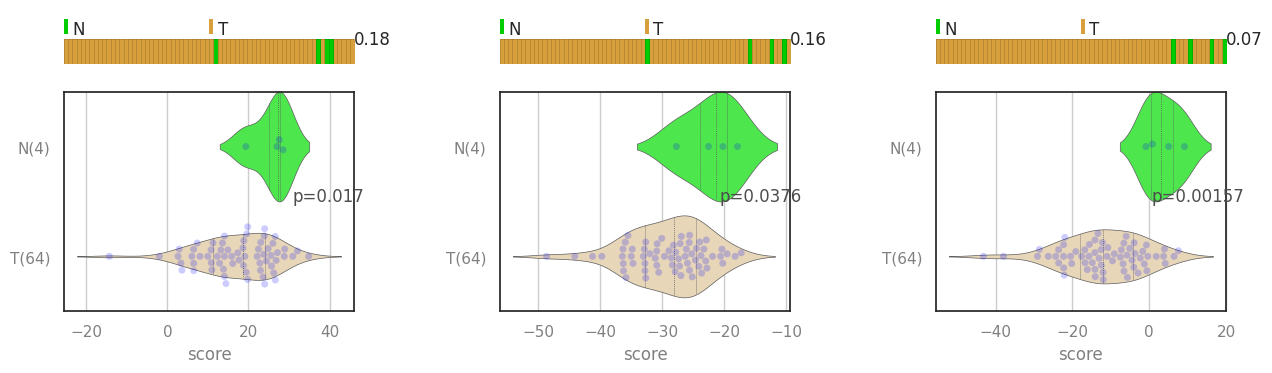

In [20]:
#Large Cohort Datasets

ana = IMMAnalysis()
ana.getColonGEOPurged(2)
fig = processDataHnorm_13_14_3_w_l1(ana,good_signature)

ana = IMMAnalysis()
ana.getTCGACRC(2)
fig = processDataHnorm_13_14_3_w_l1(ana,good_signature)

ana = IMMAnalysis()
ana.getSkrzypczak2010(2)
fig = processDataHnorm_13_14_3_w_l1(ana,good_signature)

ana = IMMAnalysis()
ana.getSole2014(2)
fig = processDataHnorm_13_14_3_w_l1(ana,good_signature)

ana = IMMAnalysis()
ana.getChen2016(2)
fig = processDataHnorm_13_14_3_w_l1(ana,good_signature)

### Bad Signature

Lee, Cho 2020 scRNA crc: Highly Tolerant & Reactive Mac cells Mac Threshold After Normalization (human, scRNA -> pseudo) (n = 57)
GSE132465 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC_New_11.2
14 [5, 5, 4] GSE132465 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC_New_11.2 CRC_New_11.2
[6]
[19, 6]
[6, 19, 6]
Lee 2020 crc scblk (n = 33)
GSE132465 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV328
33 [10, 23] GSE132465 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV328 MACV328
[6]
[19, 6]
[6, 19, 6]
Lee 2020 crc mac scblk (n = 33)
GSE132465 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV328.2
33 [10, 23] GSE132465 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV328.2 MACV328.2
[6]
[19, 6]
[6, 19, 6]
Lee 2020 crc epi scblk (n = 33)
GSE132465 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV328.3
33 [10, 23] GSE132465 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV328.3 MACV328.3
[6]
[19, 6]
[6, 19, 6]


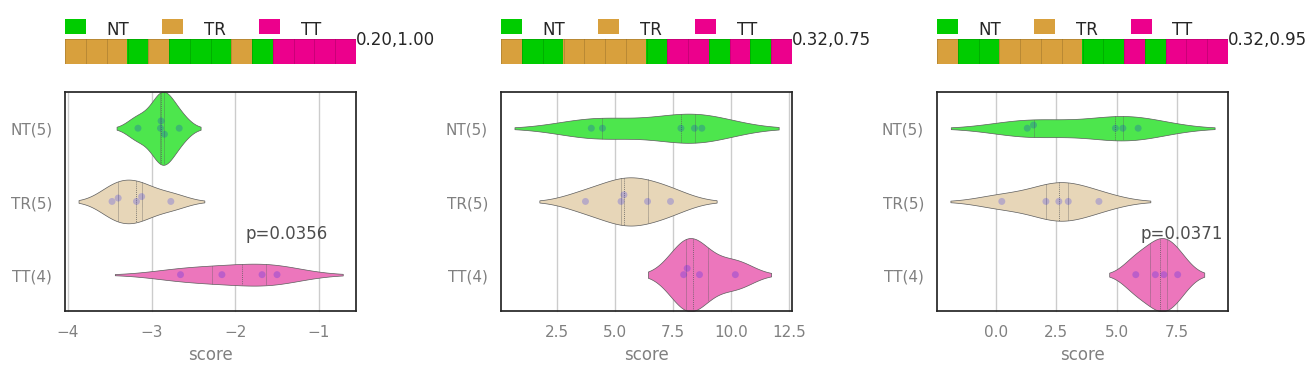

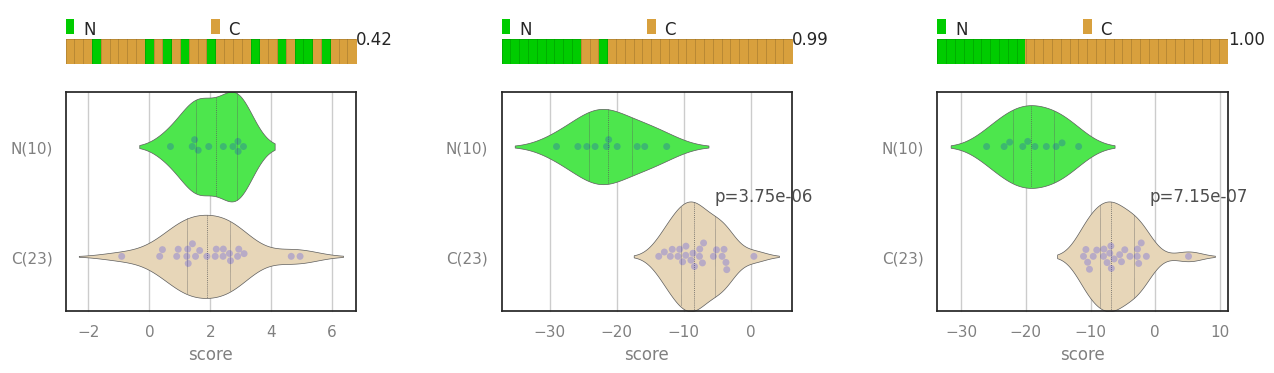

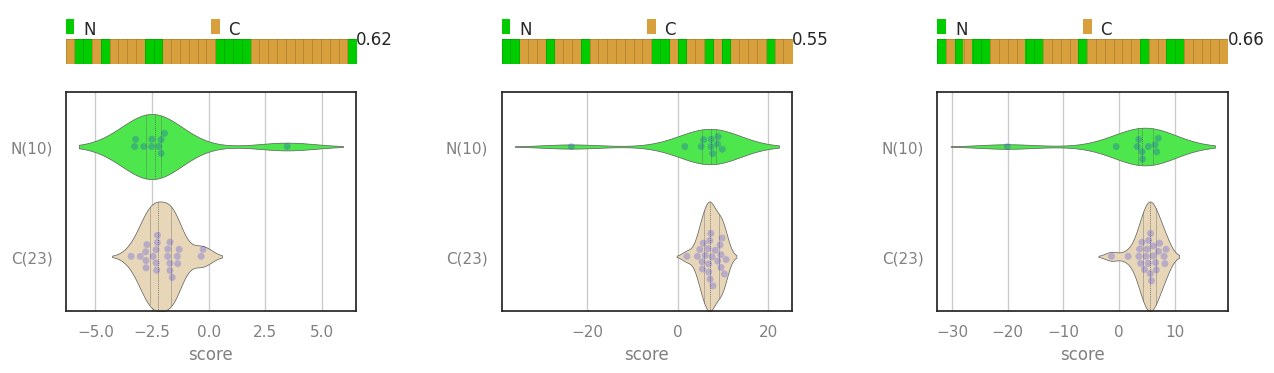

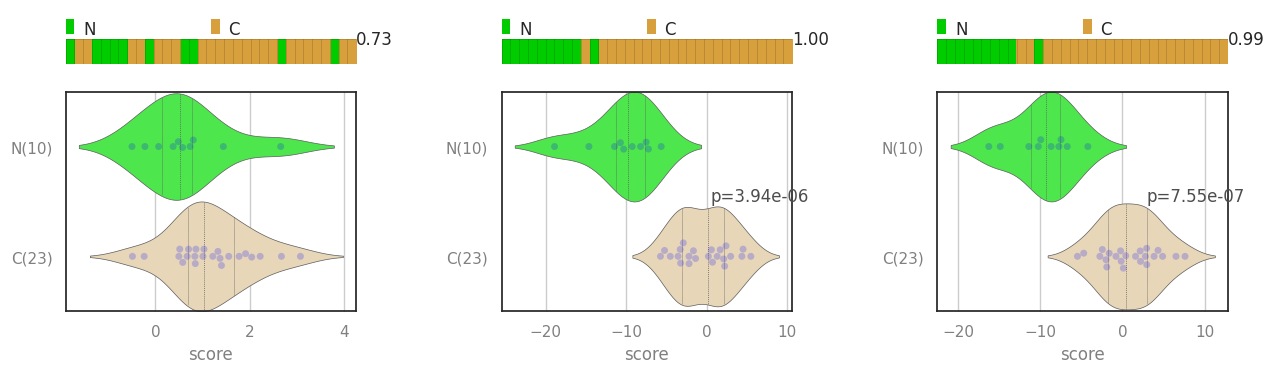

In [21]:
#Training

ana = bone.IBDAnalysis()
ana.getLee2020RTv2(4)
fig = processDataHnorm_13_14_3_w_l1(ana,bad_signature)


ana = bone.IBDAnalysis()
ana.getLee2020SCblk()
fig = processDataHnorm_13_14_3_w_l1(ana,bad_signature)

ana = bone.IBDAnalysis()
ana.getLee2020MacSCblk()
fig = processDataHnorm_13_14_3_w_l1(ana,bad_signature)


ana = bone.IBDAnalysis()
ana.getLee2020EpiSCblk()
fig = processDataHnorm_13_14_3_w_l1(ana,bad_signature)

Zheng 2022 scRNA crc: Macrophage cells (human, scRNA -> pseudo) (n = 13)
GSE161277 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC_New_3.1
7 [3, 4] GSE161277 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC_New_3.1 CRC_New_3.1
[6]
[19, 6]
[6, 19, 6]
Khaliq 2022 scRNA crc: Macrophage cells (human, scRNA -> pseudo) (n = 22)
GSE200997 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC_New_6.1
22 [7, 15] GSE200997 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC_New_6.1 CRC_New_6.1
[6]
[19, 6]
[6, 19, 6]
Guo 2023 scRNA crc: Macrophage cells (human, scRNA -> pseudo) artificial technical replicates (n = 6)
GSE222300 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC_New_7.3
6 [2, 4] GSE222300 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC_New_7.3 CRC_New_7.3
[6]
[19, 6]
[6, 19, 6]
Wu 2022 scRNA crc: Macrophage cells (human, scRNA -> pseudo) artificial technical replicates (n = 8)
GSE139555 http://hegemon.ucsd.edu/Tools/explore.php?ke

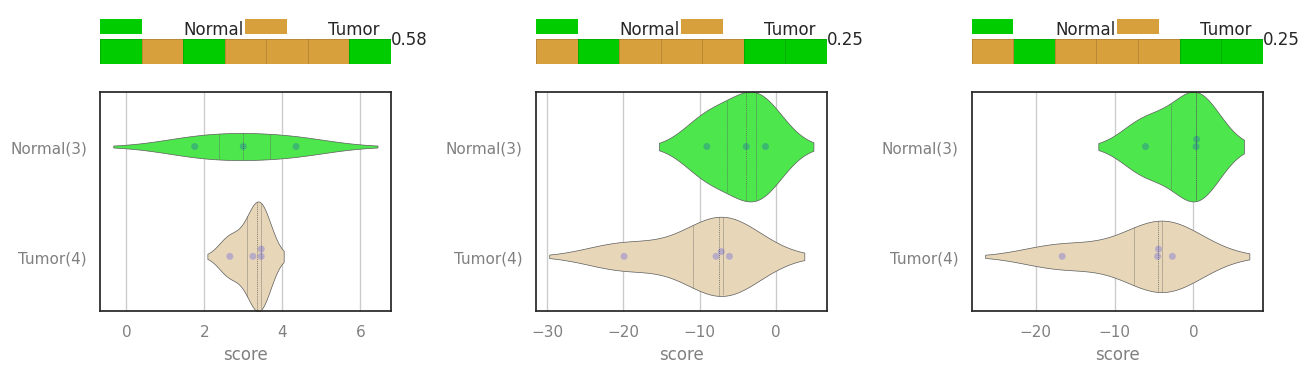

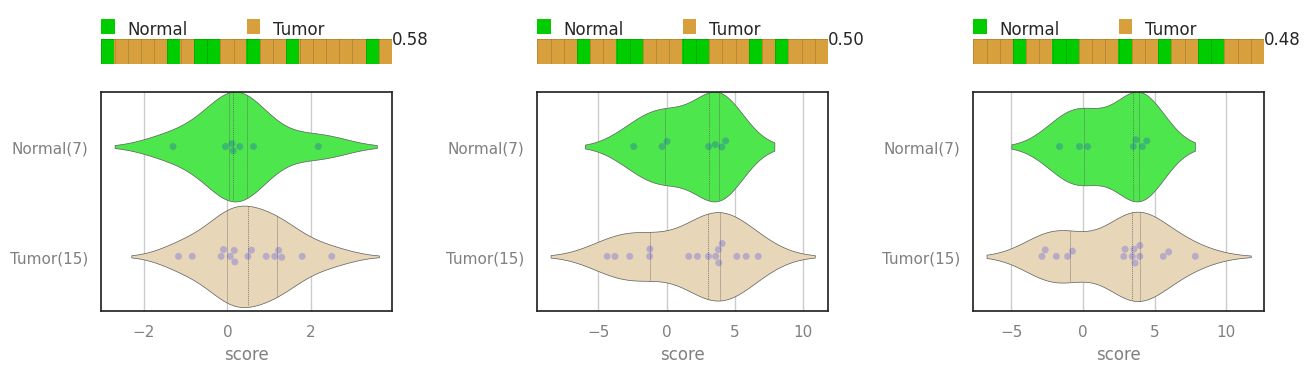

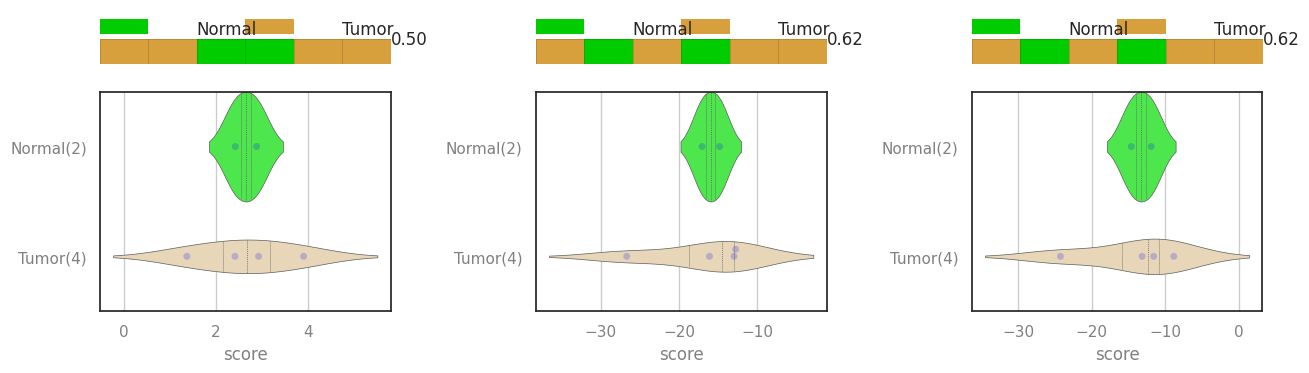

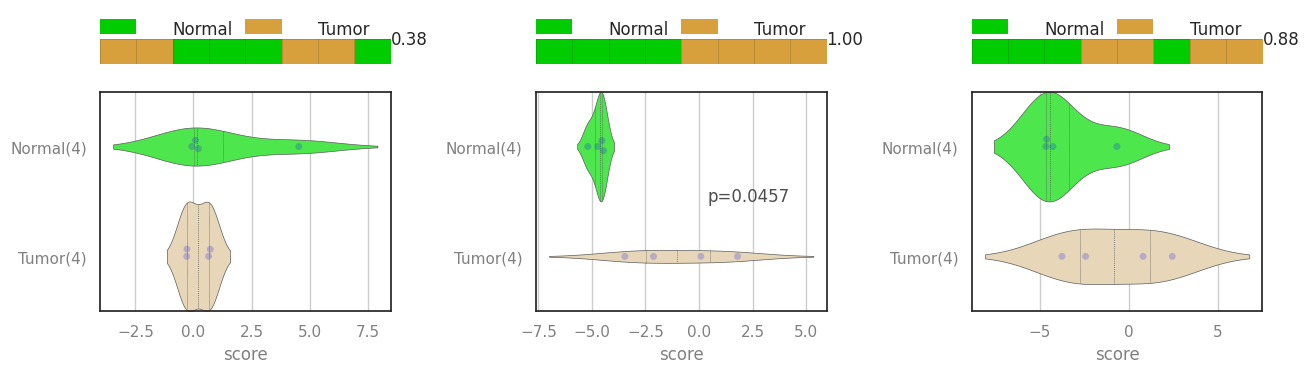

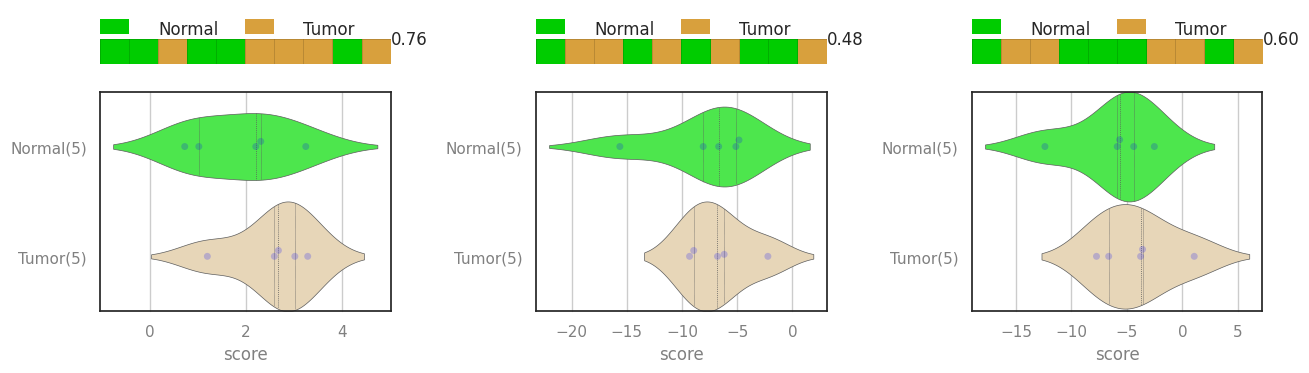

In [24]:
#Validation Datasets: Macrophage Level

ana = IMMAnalysis()
ana.get_Zheng_2022_mac_cells()
fig = processDataHnorm_13_14_3_w_l1(ana,bad_signature)

ana = IMMAnalysis()
ana.get_Khaliq_2022_mac_cells()
fig = processDataHnorm_13_14_3_w_l1(ana,bad_signature)

ana = IMMAnalysis()
ana.get_Guo_2023_mac_cells_technical_replicates()
fig = processDataHnorm_13_14_3_w_l1(ana,bad_signature)

ana = IMMAnalysis()
ana.get_Wu_2022_mac_cells_technical_replicates()
fig = processDataHnorm_13_14_3_w_l1(ana,bad_signature)


ana = IMMAnalysis()
ana.get_Lee_2022_mac_cells()
fig = processDataHnorm_13_14_3_w_l1(ana,bad_signature)

Zheng 2022 scRNA crc: All cells (human, scRNA -> pseudo) (n = 13)
GSE161277 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC_New_3
7 [3, 4] GSE161277 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC_New_3 CRC_New_3
[7]
[19, 6]
[7, 19, 6]
Khaliq 2022 scRNA crc: All cells (human, scRNA -> pseudo) (n = 23)
GSE200997 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC_New_6
23 [7, 16] GSE200997 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC_New_6 CRC_New_6
[6]
[19, 6]
[6, 19, 6]
Guo 2023 scRNA crc: All cells (human, scRNA -> pseudo) artificial technical replicates (n = 6)
GSE222300 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC_New_7.2
6 [2, 4] GSE222300 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC_New_7.2 CRC_New_7.2
[7]
[19, 6]
[7, 19, 6]
Wu 2022 scRNA crc: All cells (human, scRNA -> pseudo) artificial technical replicates (n = 8)
GSE139555 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC_New_9.2
8 [4, 4] GSE13955

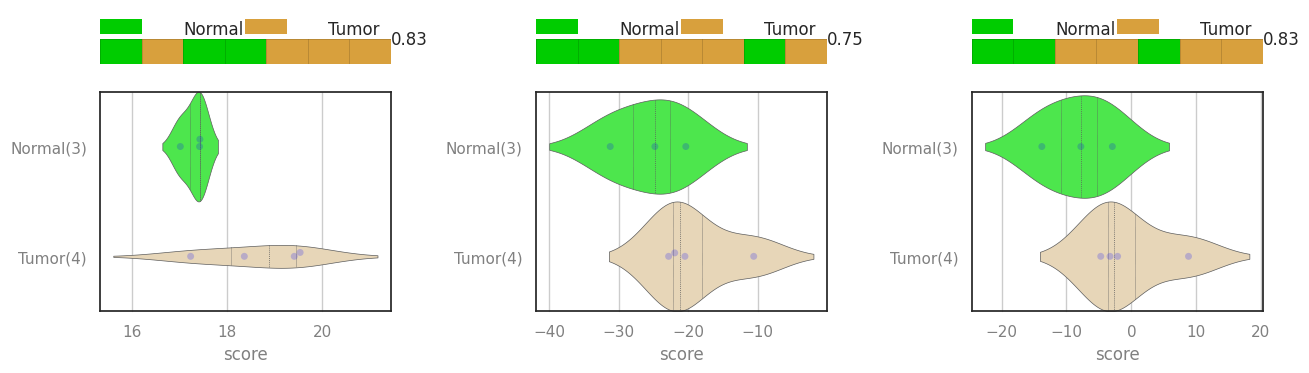

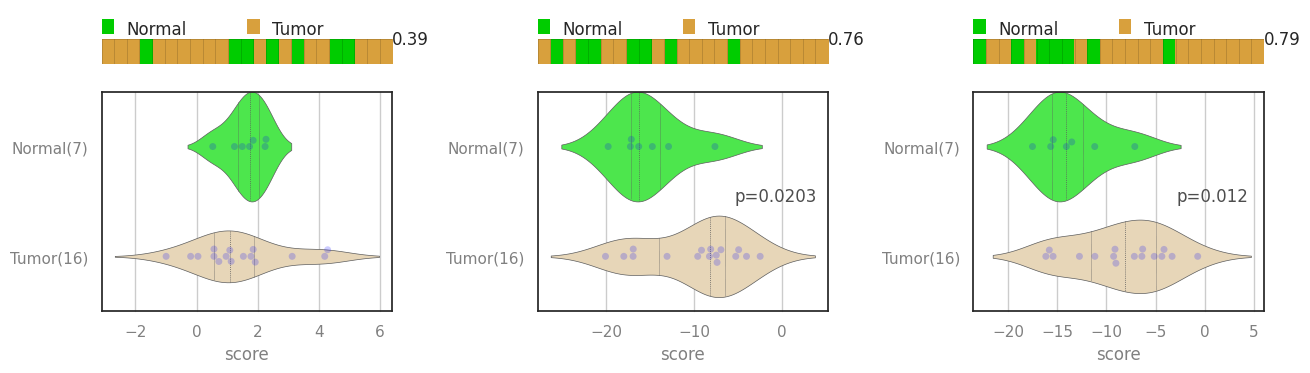

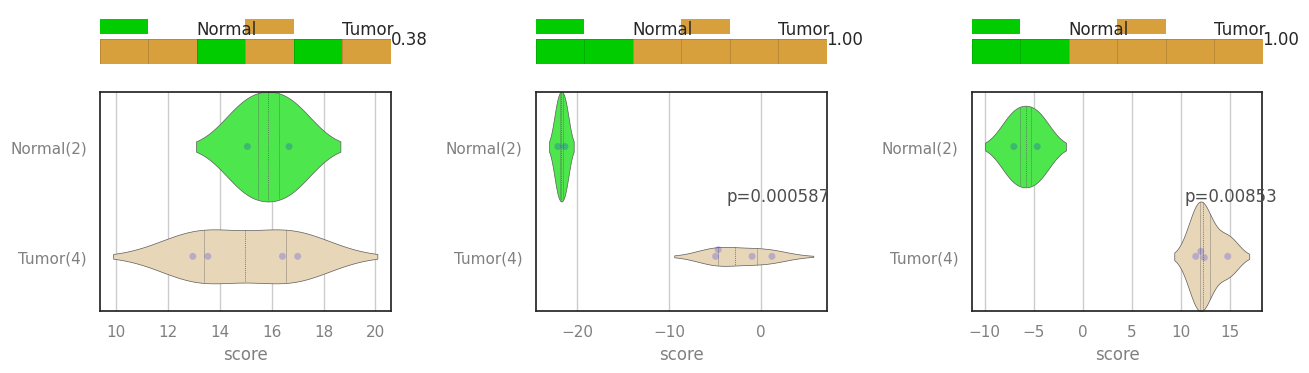

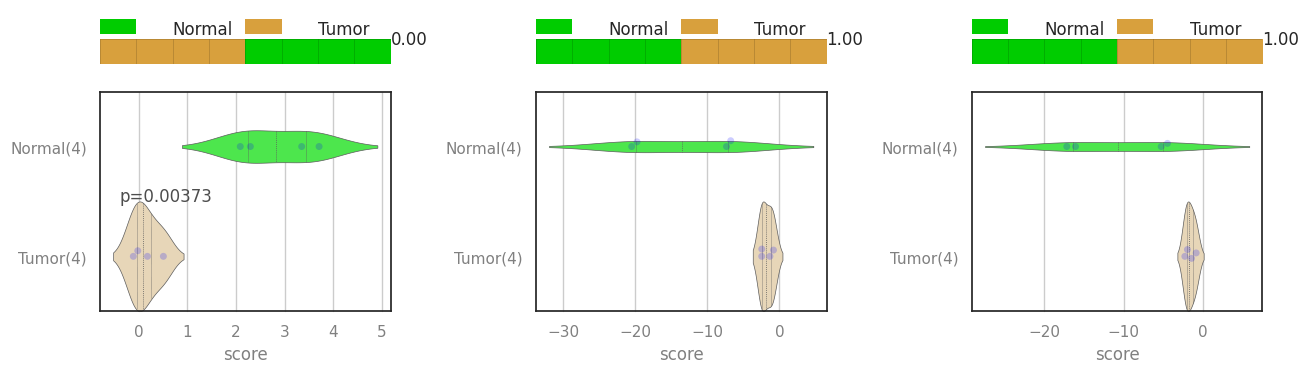

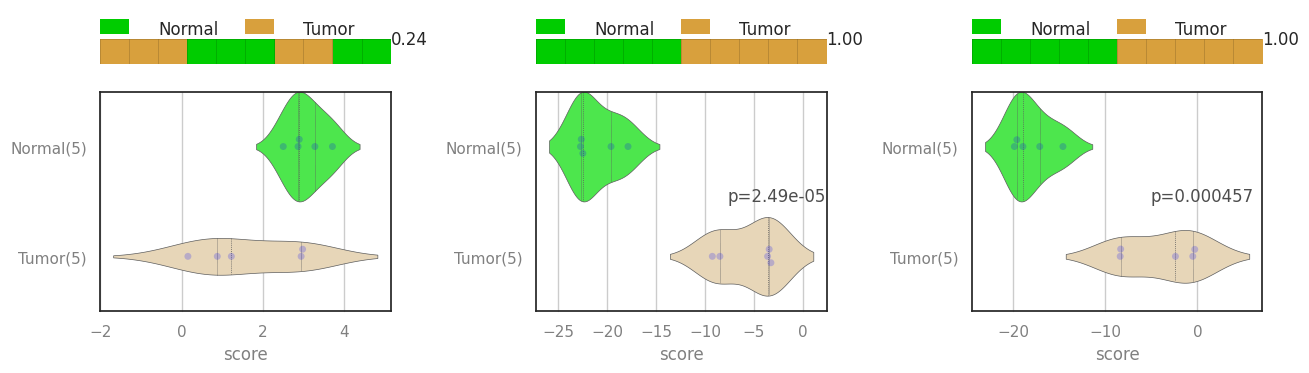

In [25]:
#Validation Datasets: All Cells Level

ana = IMMAnalysis()
ana.get_Zheng_2022_all_cells()
fig = processDataHnorm_13_14_3_w_l1(ana,bad_signature)

ana = IMMAnalysis()
ana.get_Khaliq_2022_all_cells()
fig = processDataHnorm_13_14_3_w_l1(ana,bad_signature)

ana = IMMAnalysis()
ana.get_Guo_2023_all_cells_technical_replicates()
fig = processDataHnorm_13_14_3_w_l1(ana,bad_signature)

ana = IMMAnalysis()
ana.get_Wu_2022_all_cells_technical_replicates()
fig = processDataHnorm_13_14_3_w_l1(ana,bad_signature)


ana = IMMAnalysis()
ana.get_Lee_2022_all_cells()
fig = processDataHnorm_13_14_3_w_l1(ana,bad_signature)


Global 2018 GPL570 Colon Purged (n = 1911)
GEO CRC115 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC145
1832 [170, 1662] GEO CRC115 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC145 CRC145
[4]
[11, 3]
[4, 11, 3]
TCGA 2017 CRC mRNA (n = 698)
TCGA http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC80
695 [51, 644] TCGA http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC80 CRC80
[6]
[19, 6]
[6, 19, 6]
Skrzypczak 2010 NoAdCa (n = 145)
GSE20916 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC137
70 [34, 36] GSE20916 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC137 CRC137
[10]
[50, 15]
[10, 50, 15]
Sole 2014 crc (n = 246)
GSE44076 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC149
196 [98, 98] GSE44076 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC149 CRC149
[16]
[59, 20]
[16, 59, 20]
Chen 2016 crc GPL570 (n = 68)
GSE62932 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC154
68 [4, 64] GSE62932 http:

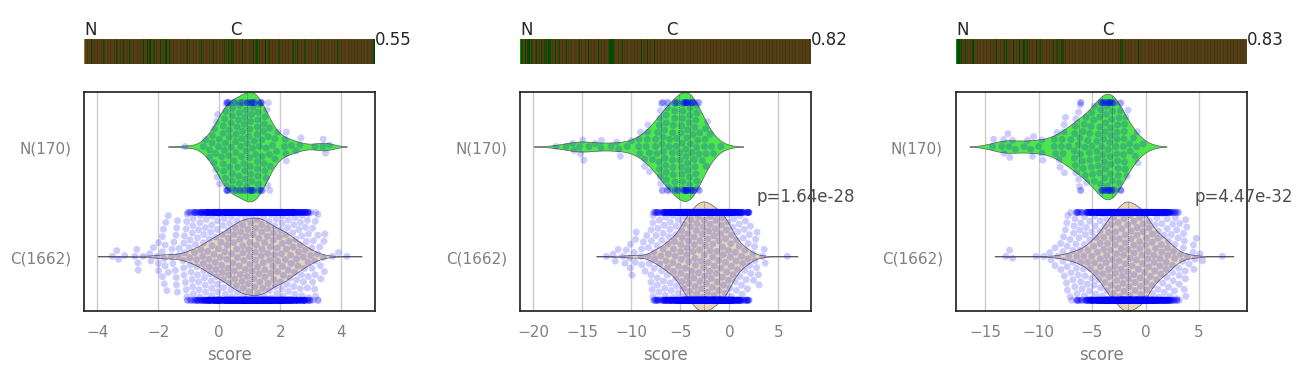

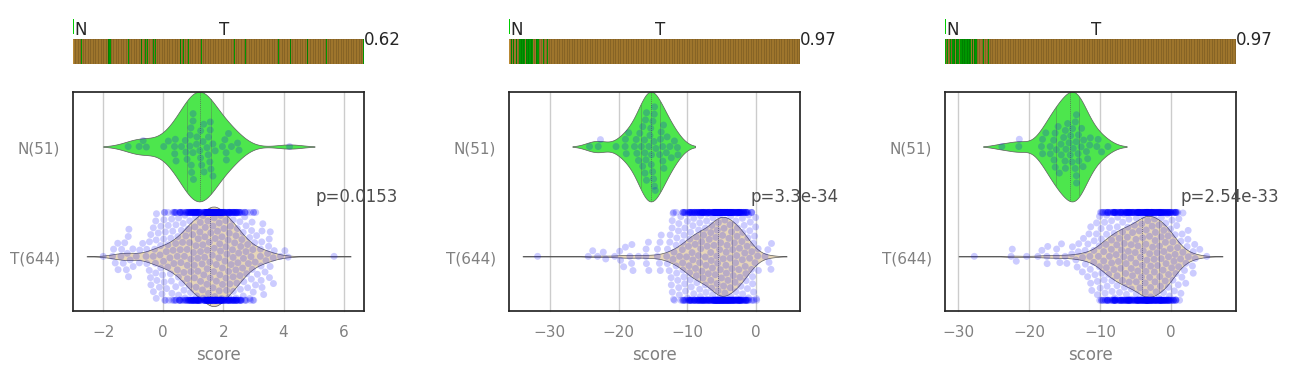

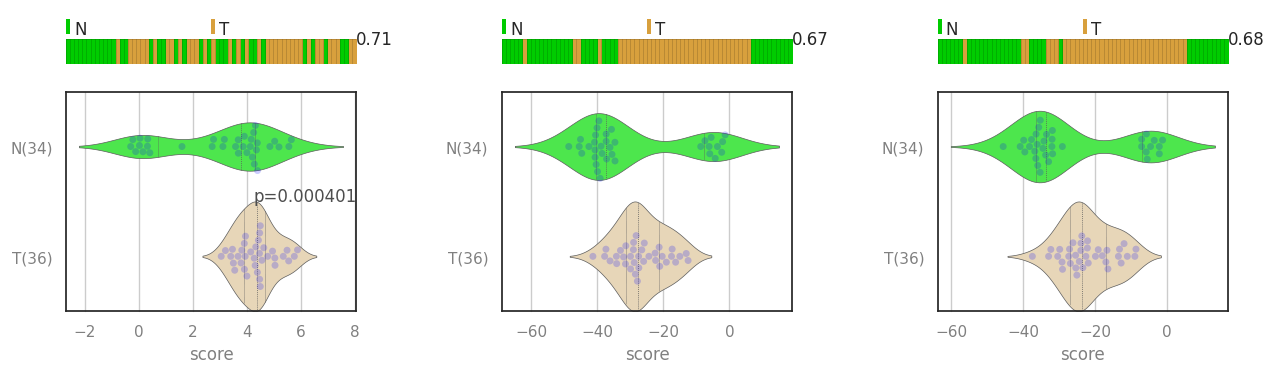

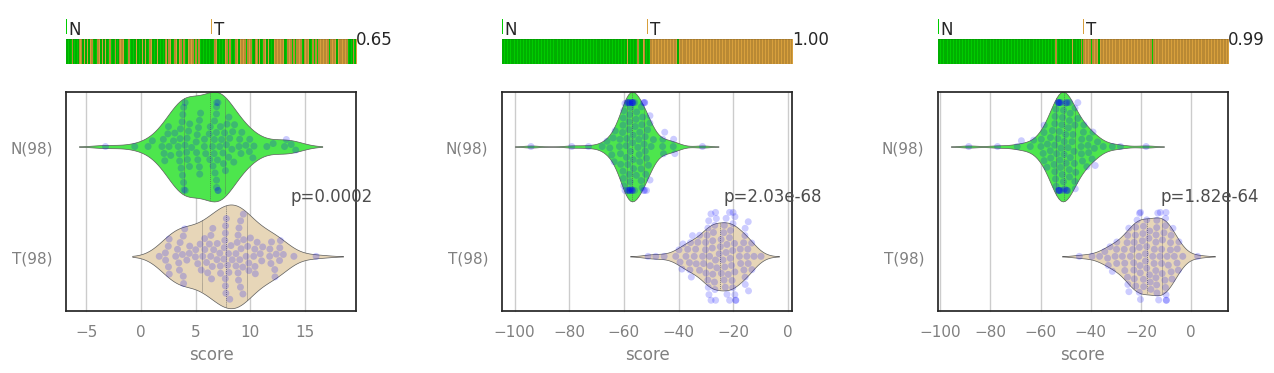

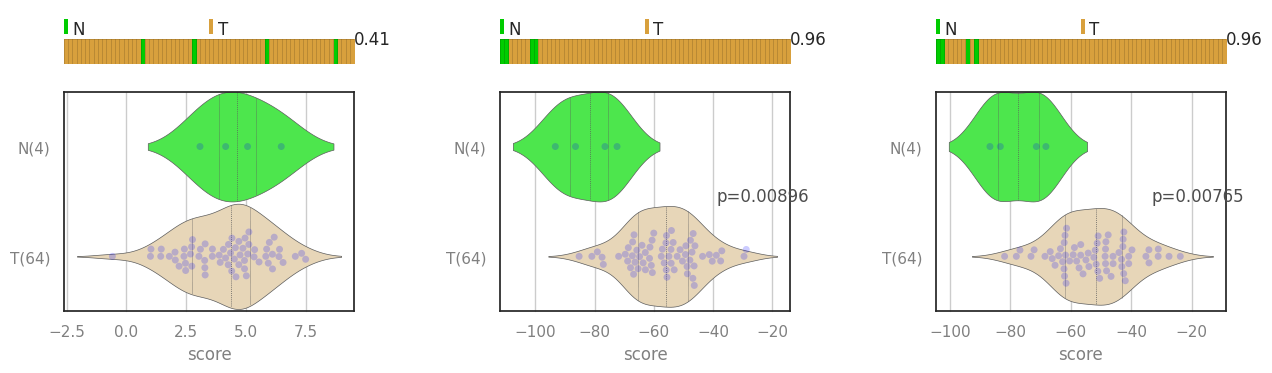

In [24]:
#Large Cohort Datasets

ana = IMMAnalysis()
ana.getColonGEOPurged(2)
fig = processDataHnorm_13_14_3_w_l1(ana,bad_signature)

ana = IMMAnalysis()
ana.getTCGACRC(2)
fig = processDataHnorm_13_14_3_w_l1(ana,bad_signature)

ana = IMMAnalysis()
ana.getSkrzypczak2010(2)
fig = processDataHnorm_13_14_3_w_l1(ana,bad_signature)

ana = IMMAnalysis()
ana.getSole2014(2)
fig = processDataHnorm_13_14_3_w_l1(ana,bad_signature)

ana = IMMAnalysis()
ana.getChen2016(2)
fig = processDataHnorm_13_14_3_w_l1(ana,bad_signature)